<font face="verdana"> 

# Exploratory Data Analysis
<br>
<br>

notes:
under plots create a new folder EDA  
update the dir link below to point to EDA

In [1]:
data_dir = 'C:/Users/Preeti/Github/CapstoneProject/plots/EDA/'

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns
import time
import copy
from datetime import datetime
from time import strftime
import warnings
warnings.simplefilter('ignore',DeprecationWarning)

from pylab import rcParams
#import hdbscan

from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler

#from sklearn.datasets import make_blobs

from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score

from sklearn import metrics
from sklearn import metrics as mt
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import confusion_matrix as conf
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score

from sklearn.cluster import KMeans

from tabulate import tabulate

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from __future__ import print_function

In [20]:
df = pd.read_csv('../data/df_model_w_cell_id.csv')
df.columns

Index(['sum_cost_pedestrian_events', 'cell_id', 'num_near_misses', 'n_rqst',
       'access', 'dblprk', 'dnotyld', 'jywalk', 'lvisib', 'lwfws', 'nobikef',
       'noswlk', 'other', 'prkint', 'prkswlk', 'speed', 'vrrlss', 'wlksig',
       'xwalk', 'assist', 'bikes', 'drives', 'other.1', 'walks',
       'mean_walk_score', 'min_walk_score', 'max_walk_score',
       'num_walk_scores', 'sum_lane_cnt', 'sum_width', 'sum_area',
       'num_streets', 'num_fire_incd', 'med_sale_res_y', 'med_sale_res_n',
       'med_sale_com_y', 'med_sale_com_n', 'med_sale_ind_y', 'med_sale_ind_n',
       'med_sale_pbo_y', 'med_sale_pbo_n', 'sum_cost.y', 'num_events.y',
       'dist', 'n_object', 'animals_insects', 'building.related',
       'construction', 'food', 'others', 'police.property',
       'service.complaint', 'street_sidewalk', 'traffic_sig0l', 'trash',
       'trees_plants', 'water.leak', 'zoning_parking', 'n_request'],
      dtype='object')

In [23]:
df.head(10)

,sum_cost_pedestrian_events,cell_id,num_near_misses,n_rqst,access,dblprk,dnotyld,jywalk,lvisib,lwfws,...,others,police.property,service.complaint,street_sidewalk,traffic_sig0l,trash,trees_plants,water.leak,zoning_parking,n_request
0,0.000,20012,0,0,0,0,0,0,0,0,...,76,7,1,39,1,283,5,0,5,428
1,0.000,20013,0,0,0,0,0,0,0,0,...,0,0,1,3,0,24,1,0,0,29
2,0.304,20015,0,0,0,0,0,0,0,0,...,2,0,0,0,1,0,0,0,0,3
3,0.000,20016,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,3
4,0.000,20019,0,0,0,0,0,0,0,0,...,0,0,4,1,0,41,1,0,0,47
5,0.000,20020,0,1,1,0,0,0,0,0,...,11,0,0,5,0,45,0,0,1,63
6,0.000,20021,0,0,0,0,0,0,0,0,...,15,0,2,2,0,80,0,0,1,102
7,0.000,20022,0,0,0,0,0,0,0,0,...,4,2,1,3,0,74,5,0,0,91
8,0.608,30012,0,1,0,0,0,0,0,0,...,46,4,1,16,0,197,2,0,0,274
9,0.000,30013,0,2,0,0,0,0,0,0,...,21,0,2,2,0,90,3,0,0,120


In [24]:
from tabulate import tabulate
tabulate(print("\n1. Total number of records: ",df.shape[0],
               "\n2. Total number of columns: ",df.shape[1],
               "\n3. Column Names : ",df.columns,
               "\n4. Are there any duplicate records?", df.duplicated().any())
                         , tablefmt='textile')
print("\n******* Numerical attributes and their range *******")
df.describe().T


1. Total number of records:  4196 
2. Total number of columns:  59 
3. Column Names :  Index(['sum_cost_pedestrian_events', 'cell_id', 'num_near_misses', 'n_rqst',
       'access', 'dblprk', 'dnotyld', 'jywalk', 'lvisib', 'lwfws', 'nobikef',
       'noswlk', 'other', 'prkint', 'prkswlk', 'speed', 'vrrlss', 'wlksig',
       'xwalk', 'assist', 'bikes', 'drives', 'other.1', 'walks',
       'mean_walk_score', 'min_walk_score', 'max_walk_score',
       'num_walk_scores', 'sum_lane_cnt', 'sum_width', 'sum_area',
       'num_streets', 'num_fire_incd', 'med_sale_res_y', 'med_sale_res_n',
       'med_sale_com_y', 'med_sale_com_n', 'med_sale_ind_y', 'med_sale_ind_n',
       'med_sale_pbo_y', 'med_sale_pbo_n', 'sum_cost.y', 'num_events.y',
       'dist', 'n_object', 'animals_insects', 'building.related',
       'construction', 'food', 'others', 'police.property',
       'service.complaint', 'street_sidewalk', 'traffic_sig0l', 'trash',
       'trees_plants', 'water.leak', 'zoning_parking', 'n_req

''


******* Numerical attributes and their range *******


,count,mean,std,min,25%,50%,75%,max
sum_cost_pedestrian_events,4196.0,0.559855,2.278113e+00,0.000000,0.000000,0.000000,0.000000,2.842100e+01
cell_id,4196.0,614442.901096,3.146597e+05,20012.000000,320031.750000,640054.500000,850063.250000,1.520036e+06
num_near_misses,4196.0,0.020019,2.403406e-01,0.000000,0.000000,0.000000,0.000000,1.100000e+01
n_rqst,4196.0,0.708532,3.574994e+00,0.000000,0.000000,0.000000,0.000000,8.200000e+01
access,4196.0,0.007865,1.595139e-01,0.000000,0.000000,0.000000,0.000000,7.000000e+00
dblprk,4196.0,0.009533,1.231477e-01,0.000000,0.000000,0.000000,0.000000,3.000000e+00
dnotyld,4196.0,0.104147,1.102547e+00,0.000000,0.000000,0.000000,0.000000,4.100000e+01
jywalk,4196.0,0.026930,2.744403e-01,0.000000,0.000000,0.000000,0.000000,9.000000e+00
lvisib,4196.0,0.040038,3.146308e-01,0.000000,0.000000,0.000000,0.000000,8.000000e+00
lwfws,4196.0,0.010724,1.750310e-01,0.000000,0.000000,0.000000,0.000000,7.000000e+00


In [52]:
col_names = df.columns
for col in col_names:
    print("Column Name: ",col)
    df[col].head()

Column Name:  sum_cost_pedestrian_events


0    0.000
1    0.000
2    0.304
3    0.000
4    0.000
Name: sum_cost_pedestrian_events, dtype: float64

Column Name:  cell_id


0    20012
1    20013
2    20015
3    20016
4    20019
Name: cell_id, dtype: int64

Column Name:  num_near_misses


0    0
1    0
2    0
3    0
4    0
Name: num_near_misses, dtype: int64

Column Name:  n_rqst


0    0
1    0
2    0
3    0
4    0
Name: n_rqst, dtype: int64

Column Name:  access


0    0
1    0
2    0
3    0
4    0
Name: access, dtype: int64

Column Name:  dblprk


0    0
1    0
2    0
3    0
4    0
Name: dblprk, dtype: int64

Column Name:  dnotyld


0    0
1    0
2    0
3    0
4    0
Name: dnotyld, dtype: int64

Column Name:  jywalk


0    0
1    0
2    0
3    0
4    0
Name: jywalk, dtype: int64

Column Name:  lvisib


0    0
1    0
2    0
3    0
4    0
Name: lvisib, dtype: int64

Column Name:  lwfws


0    0
1    0
2    0
3    0
4    0
Name: lwfws, dtype: int64

Column Name:  nobikef


0    0
1    0
2    0
3    0
4    0
Name: nobikef, dtype: int64

Column Name:  noswlk


0    0
1    0
2    0
3    0
4    0
Name: noswlk, dtype: int64

Column Name:  other


0    0
1    0
2    0
3    0
4    0
Name: other, dtype: int64

Column Name:  prkint


0    0
1    0
2    0
3    0
4    0
Name: prkint, dtype: int64

Column Name:  prkswlk


0    0
1    0
2    0
3    0
4    0
Name: prkswlk, dtype: int64

Column Name:  speed


0    0
1    0
2    0
3    0
4    0
Name: speed, dtype: int64

Column Name:  vrrlss


0    0
1    0
2    0
3    0
4    0
Name: vrrlss, dtype: int64

Column Name:  wlksig


0    0
1    0
2    0
3    0
4    0
Name: wlksig, dtype: int64

Column Name:  xwalk


0    0
1    0
2    0
3    0
4    0
Name: xwalk, dtype: int64

Column Name:  assist


0    0
1    0
2    0
3    0
4    0
Name: assist, dtype: int64

Column Name:  bikes


0    0
1    0
2    0
3    0
4    0
Name: bikes, dtype: int64

Column Name:  drives


0    0
1    0
2    0
3    0
4    0
Name: drives, dtype: int64

Column Name:  other.1


0    0
1    0
2    0
3    0
4    0
Name: other.1, dtype: int64

Column Name:  walks


0    0
1    0
2    0
3    0
4    0
Name: walks, dtype: int64

Column Name:  mean_walk_score


0    46.0
1    46.0
2    46.0
3    46.0
4    13.0
Name: mean_walk_score, dtype: float64

Column Name:  min_walk_score


0    44
1    44
2    44
3    44
4    13
Name: min_walk_score, dtype: int64

Column Name:  max_walk_score


0    48
1    48
2    48
3    48
4    13
Name: max_walk_score, dtype: int64

Column Name:  num_walk_scores


0    0
1    0
2    0
3    0
4    1
Name: num_walk_scores, dtype: int64

Column Name:  sum_lane_cnt


0    300
1    184
2      4
3     70
4     63
Name: sum_lane_cnt, dtype: int64

Column Name:  sum_width


0    3508
1    2208
2      40
3     712
4     588
Name: sum_width, dtype: int64

Column Name:  sum_area


0    2589954
1    2382962
2      31112
3     197304
4     135269
Name: sum_area, dtype: int64

Column Name:  num_streets


0    142
1     92
2      1
3     35
4     21
Name: num_streets, dtype: int64

Column Name:  num_fire_incd


0    0
1    0
2    0
3    0
4    0
Name: num_fire_incd, dtype: int64

Column Name:  med_sale_res_y


0    143450.75
1    141625.00
2    161385.00
3    498695.00
4    244871.00
Name: med_sale_res_y, dtype: float64

Column Name:  med_sale_res_n


0     86666.0
1    129108.0
2    129108.0
3    129108.0
4    125631.0
Name: med_sale_res_n, dtype: float64

Column Name:  med_sale_com_y


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: med_sale_com_y, dtype: float64

Column Name:  med_sale_com_n


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: med_sale_com_n, dtype: float64

Column Name:  med_sale_ind_y


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: med_sale_ind_y, dtype: float64

Column Name:  med_sale_ind_n


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: med_sale_ind_n, dtype: float64

Column Name:  med_sale_pbo_y


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: med_sale_pbo_y, dtype: float64

Column Name:  med_sale_pbo_n


0    0
1    0
2    0
3    0
4    0
Name: med_sale_pbo_n, dtype: int64

Column Name:  sum_cost.y


0    112.005
1     10.082
2     40.328
3      0.304
4      0.000
Name: sum_cost.y, dtype: float64

Column Name:  num_events.y


0    12
1     1
2     4
3     1
4     0
Name: num_events.y, dtype: int64

Column Name:  dist


0    0.007245
1    0.005151
2    0.002240
3    0.002888
4    0.007902
Name: dist, dtype: float64

Column Name:  n_object


0    12
1    12
2    12
3    12
4    12
Name: n_object, dtype: int64

Column Name:  animals_insects


0    4
1    0
2    0
3    0
4    0
Name: animals_insects, dtype: int64

Column Name:  building.related


0    7
1    0
2    0
3    2
4    0
Name: building.related, dtype: int64

Column Name:  construction


0    0
1    0
2    0
3    0
4    0
Name: construction, dtype: int64

Column Name:  food


0    0
1    0
2    0
3    0
4    0
Name: food, dtype: int64

Column Name:  others


0    76
1     0
2     2
3     0
4     0
Name: others, dtype: int64

Column Name:  police.property


0    7
1    0
2    0
3    0
4    0
Name: police.property, dtype: int64

Column Name:  service.complaint


0    1
1    1
2    0
3    0
4    4
Name: service.complaint, dtype: int64

Column Name:  street_sidewalk


0    39
1     3
2     0
3     1
4     1
Name: street_sidewalk, dtype: int64

Column Name:  traffic_sig0l


0    1
1    0
2    1
3    0
4    0
Name: traffic_sig0l, dtype: int64

Column Name:  trash


0    283
1     24
2      0
3      0
4     41
Name: trash, dtype: int64

Column Name:  trees_plants


0    5
1    1
2    0
3    0
4    1
Name: trees_plants, dtype: int64

Column Name:  water.leak


0    0
1    0
2    0
3    0
4    0
Name: water.leak, dtype: int64

Column Name:  zoning_parking


0    5
1    0
2    0
3    0
4    0
Name: zoning_parking, dtype: int64

Column Name:  n_request


0    428
1     29
2      3
3      3
4     47
Name: n_request, dtype: int64

In [53]:
for col in df.columns:
    #if df[col].isnull().sum() > 0.0:
    print("#Missing values in ",col,": ",df[col].isnull().sum(),",  % missing :" ,round((df[col].isnull().sum()/df.shape[0])*100, 4))
        #print("% of missing value in ",col," ",round((df[col].isnull().sum()/df.shape[0])*100, 2))

#Missing values in  sum_cost_pedestrian_events :  0 ,  % missing : 0.0
#Missing values in  cell_id :  0 ,  % missing : 0.0
#Missing values in  num_near_misses :  0 ,  % missing : 0.0
#Missing values in  n_rqst :  0 ,  % missing : 0.0
#Missing values in  access :  0 ,  % missing : 0.0
#Missing values in  dblprk :  0 ,  % missing : 0.0
#Missing values in  dnotyld :  0 ,  % missing : 0.0
#Missing values in  jywalk :  0 ,  % missing : 0.0
#Missing values in  lvisib :  0 ,  % missing : 0.0
#Missing values in  lwfws :  0 ,  % missing : 0.0
#Missing values in  nobikef :  0 ,  % missing : 0.0
#Missing values in  noswlk :  0 ,  % missing : 0.0
#Missing values in  other :  0 ,  % missing : 0.0
#Missing values in  prkint :  0 ,  % missing : 0.0
#Missing values in  prkswlk :  0 ,  % missing : 0.0
#Missing values in  speed :  0 ,  % missing : 0.0
#Missing values in  vrrlss :  0 ,  % missing : 0.0
#Missing values in  wlksig :  0 ,  % missing : 0.0
#Missing values in  xwalk :  0 ,  % missing : 0.0
#M

<font face="verdana"> 

###  Correlation Matrix

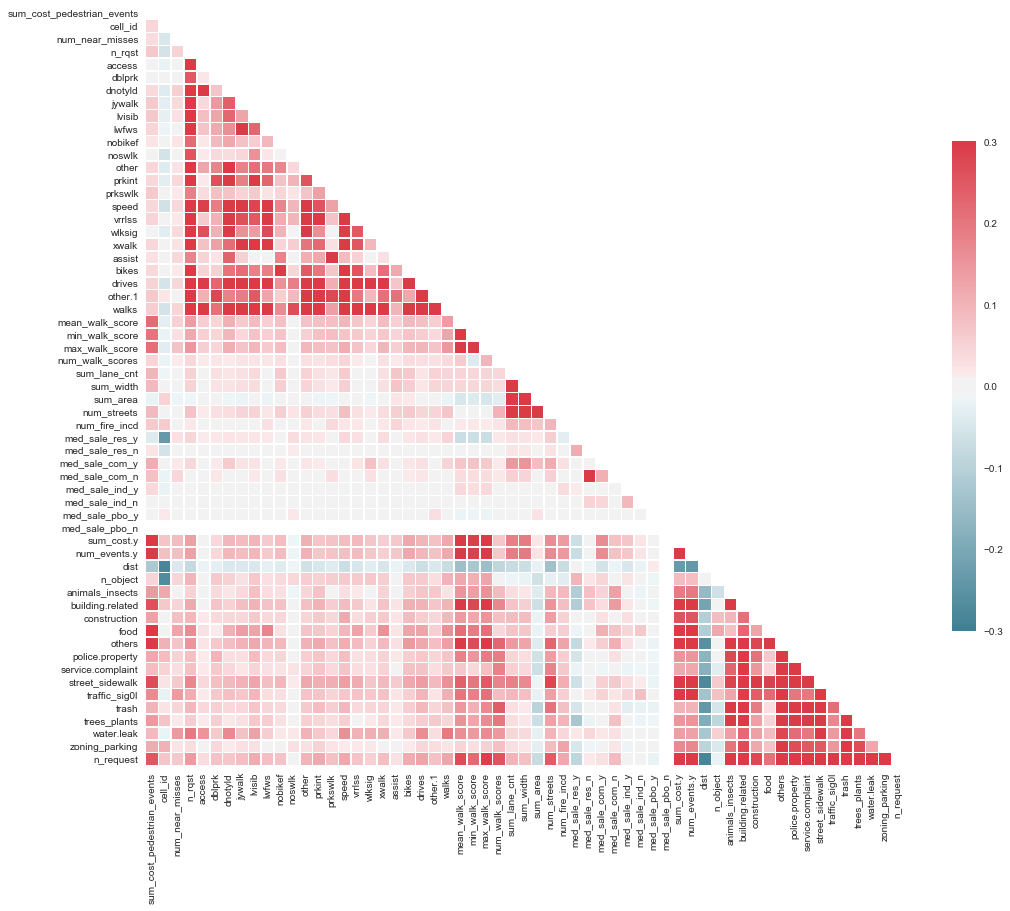

In [8]:
# Compute the correlation matrix
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(17, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#save plots for later use
plot_type = "Correlation_"
plot_name = "Matrix"
data_file_ext = ".png"
plt_file_2_save = data_dir + plot_type + plot_name + data_file_ext
plt.savefig(plt_file_2_save)
    
plt.show()

<font face="verdana"> 
  
  ### Observations and next steps:



In [45]:
numeric_col_names = df.select_dtypes(include=['number']).columns
numeric_col_names.drop('cell_id')
numeric_col_names

Index(['sum_cost_pedestrian_events', 'num_near_misses', 'n_rqst', 'access',
       'dblprk', 'dnotyld', 'jywalk', 'lvisib', 'lwfws', 'nobikef', 'noswlk',
       'other', 'prkint', 'prkswlk', 'speed', 'vrrlss', 'wlksig', 'xwalk',
       'assist', 'bikes', 'drives', 'other.1', 'walks', 'mean_walk_score',
       'min_walk_score', 'max_walk_score', 'num_walk_scores', 'sum_lane_cnt',
       'sum_width', 'sum_area', 'num_streets', 'num_fire_incd',
       'med_sale_res_y', 'med_sale_res_n', 'med_sale_com_y', 'med_sale_com_n',
       'med_sale_ind_y', 'med_sale_ind_n', 'med_sale_pbo_y', 'med_sale_pbo_n',
       'sum_cost.y', 'num_events.y', 'dist', 'n_object', 'animals_insects',
       'building.related', 'construction', 'food', 'others', 'police.property',
       'service.complaint', 'street_sidewalk', 'traffic_sig0l', 'trash',
       'trees_plants', 'water.leak', 'zoning_parking', 'n_request'],
      dtype='object')

Index(['sum_cost_pedestrian_events', 'cell_id', 'num_near_misses', 'n_rqst',
       'access', 'dblprk', 'dnotyld', 'jywalk', 'lvisib', 'lwfws', 'nobikef',
       'noswlk', 'other', 'prkint', 'prkswlk', 'speed', 'vrrlss', 'wlksig',
       'xwalk', 'assist', 'bikes', 'drives', 'other.1', 'walks',
       'mean_walk_score', 'min_walk_score', 'max_walk_score',
       'num_walk_scores', 'sum_lane_cnt', 'sum_width', 'sum_area',
       'num_streets', 'num_fire_incd', 'med_sale_res_y', 'med_sale_res_n',
       'med_sale_com_y', 'med_sale_com_n', 'med_sale_ind_y', 'med_sale_ind_n',
       'med_sale_pbo_y', 'med_sale_pbo_n', 'sum_cost.y', 'num_events.y',
       'dist', 'n_object', 'animals_insects', 'building.related',
       'construction', 'food', 'others', 'police.property',
       'service.complaint', 'street_sidewalk', 'traffic_sig0l', 'trash',
       'trees_plants', 'water.leak', 'zoning_parking', 'n_request'],
      dtype='object')

(array([4.035e+03, 4.000e+01, 1.000e+01, 5.700e+01, 2.800e+01, 1.000e+01,
        2.000e+00, 8.000e+00, 4.000e+00, 2.000e+00]),
 array([ 0.    ,  2.8421,  5.6842,  8.5263, 11.3684, 14.2105, 17.0526,
        19.8947, 22.7368, 25.5789, 28.421 ]),
 <a list of 10 Patch objects>)

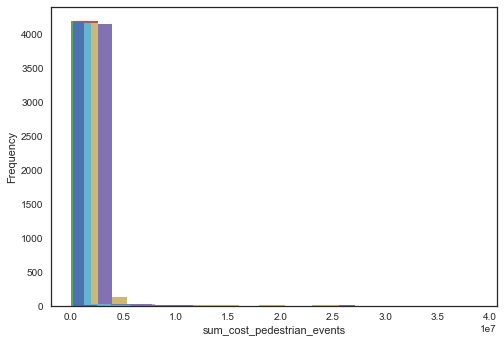

(array([286., 758., 380., 545., 742., 770., 510., 100.,  26.,  79.]),
 array([  20012. ,  170014.4,  320016.8,  470019.2,  620021.6,  770024. ,
         920026.4, 1070028.8, 1220031.2, 1370033.6, 1520036. ]),
 <a list of 10 Patch objects>)

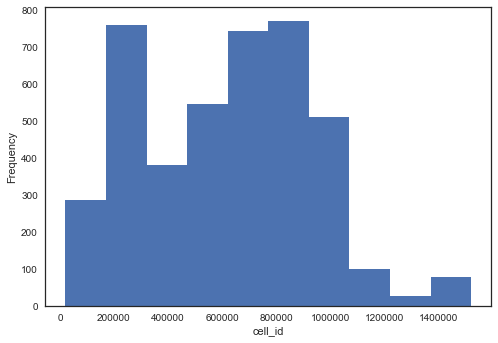

(array([4.186e+03, 6.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <a list of 10 Patch objects>)

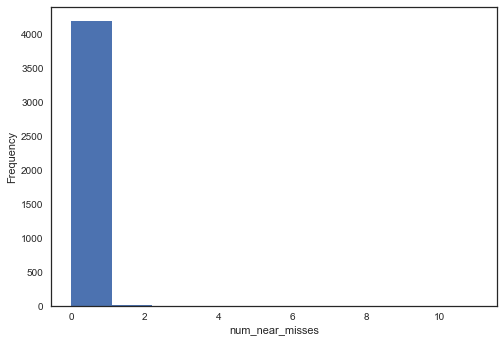

(array([4.112e+03, 4.800e+01, 1.700e+01, 7.000e+00, 6.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00]),
 array([ 0. ,  8.2, 16.4, 24.6, 32.8, 41. , 49.2, 57.4, 65.6, 73.8, 82. ]),
 <a list of 10 Patch objects>)

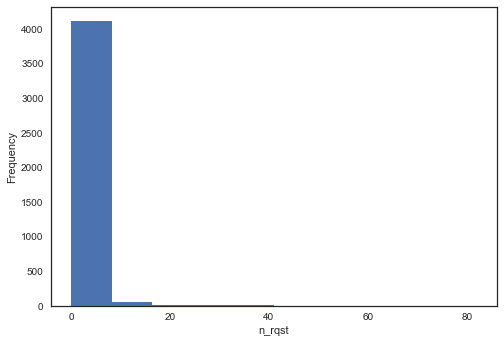

(array([4.178e+03, 1.300e+01, 1.000e+00, 0.000e+00, 1.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

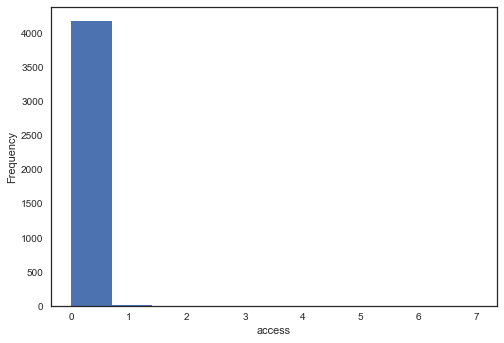

(array([4.167e+03, 0.000e+00, 0.000e+00, 1.900e+01, 0.000e+00, 0.000e+00,
        9.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

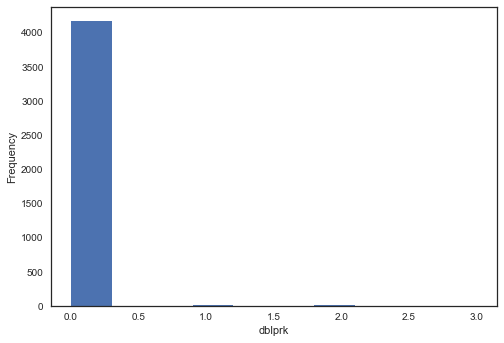

(array([4.169e+03, 1.700e+01, 3.000e+00, 3.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0. ,  4.1,  8.2, 12.3, 16.4, 20.5, 24.6, 28.7, 32.8, 36.9, 41. ]),
 <a list of 10 Patch objects>)

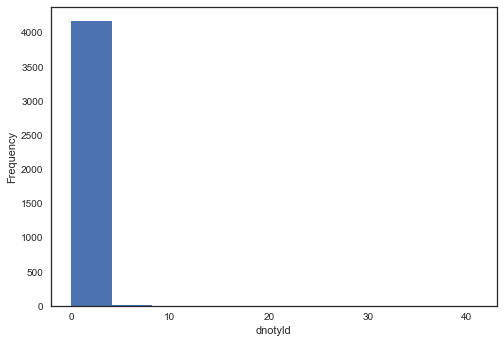

(array([4.132e+03, 3.900e+01, 1.400e+01, 5.000e+00, 3.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

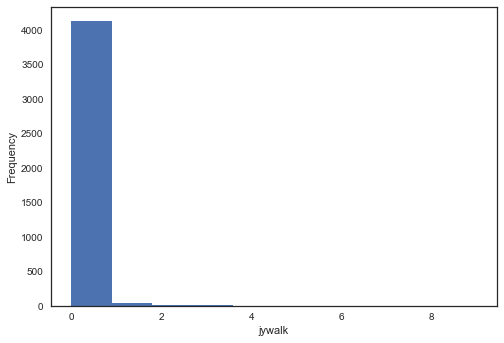

(array([4.094e+03, 6.700e+01, 1.900e+01, 9.000e+00, 0.000e+00, 3.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 10 Patch objects>)

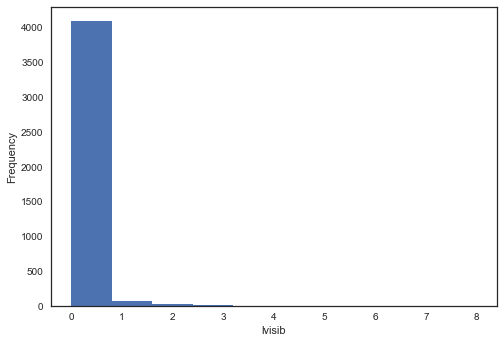

(array([4.169e+03, 2.000e+01, 2.000e+00, 0.000e+00, 3.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

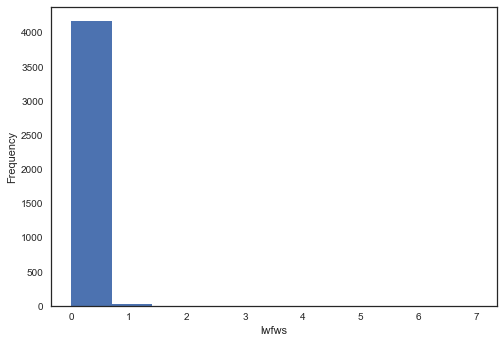

(array([4.158e+03, 0.000e+00, 2.900e+01, 0.000e+00, 0.000e+00, 7.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

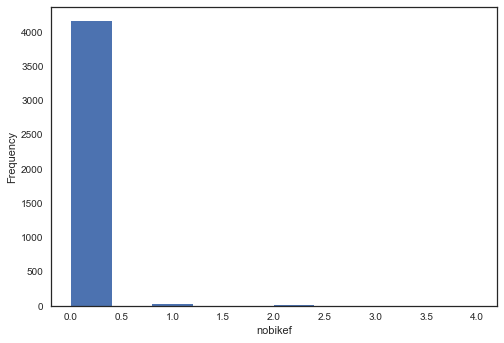

(array([4.178e+03, 1.200e+01, 2.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0. ,  2.6,  5.2,  7.8, 10.4, 13. , 15.6, 18.2, 20.8, 23.4, 26. ]),
 <a list of 10 Patch objects>)

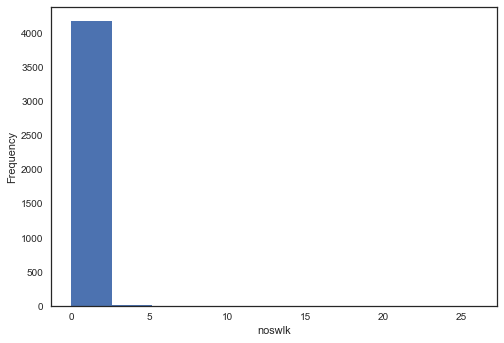

(array([4.166e+03, 1.900e+01, 4.000e+00, 2.000e+00, 0.000e+00, 3.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0. ,  2.1,  4.2,  6.3,  8.4, 10.5, 12.6, 14.7, 16.8, 18.9, 21. ]),
 <a list of 10 Patch objects>)

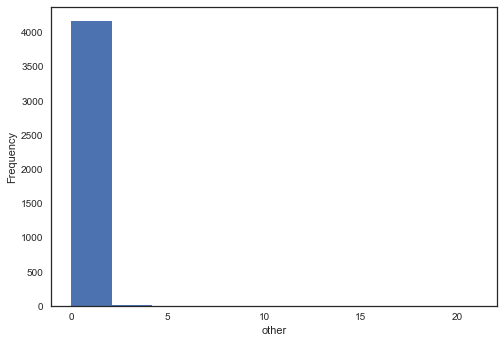

(array([4.123e+03, 0.000e+00, 5.200e+01, 0.000e+00, 1.500e+01, 0.000e+00,
        3.000e+00, 0.000e+00, 2.000e+00, 1.000e+00]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

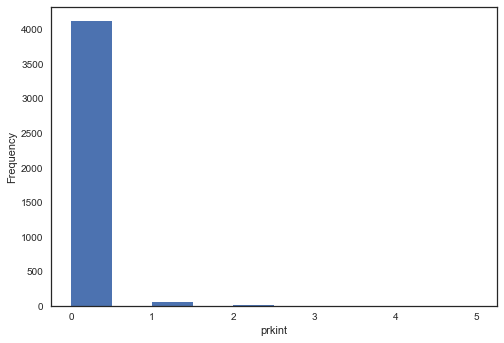

(array([4.143e+03, 4.200e+01, 4.000e+00, 3.000e+00, 0.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 10 Patch objects>)

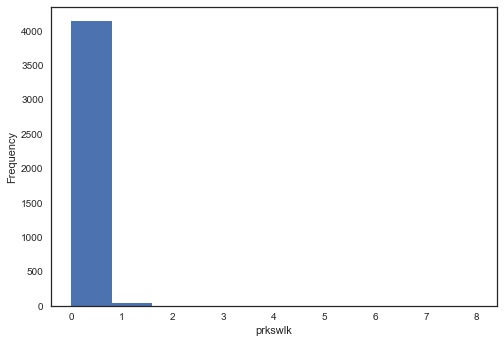

(array([4.05e+03, 9.30e+01, 2.40e+01, 1.20e+01, 6.00e+00, 5.00e+00,
        1.00e+00, 1.00e+00, 2.00e+00, 2.00e+00]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <a list of 10 Patch objects>)

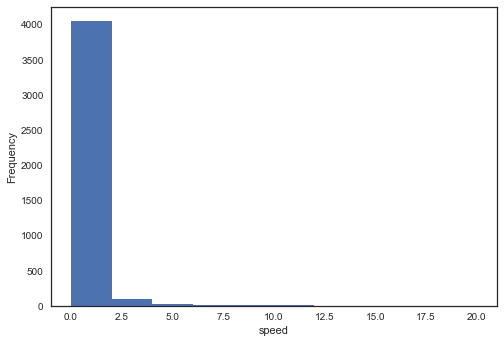

(array([4.15e+03, 2.20e+01, 1.10e+01, 3.00e+00, 1.00e+00, 3.00e+00,
        2.00e+00, 0.00e+00, 2.00e+00, 2.00e+00]),
 array([ 0. ,  1.8,  3.6,  5.4,  7.2,  9. , 10.8, 12.6, 14.4, 16.2, 18. ]),
 <a list of 10 Patch objects>)

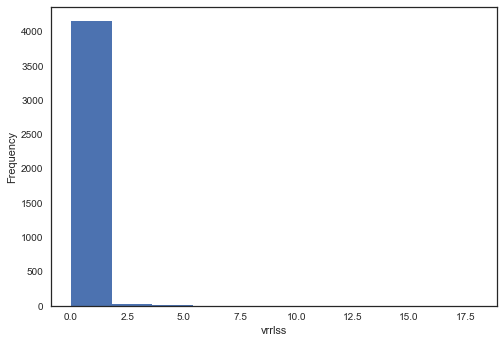

(array([4.169e+03, 0.000e+00, 1.600e+01, 0.000e+00, 8.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 1.000e+00]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

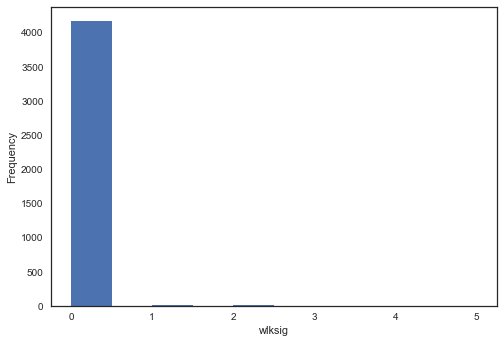

(array([4.154e+03, 1.900e+01, 1.000e+01, 2.000e+00, 8.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <a list of 10 Patch objects>)

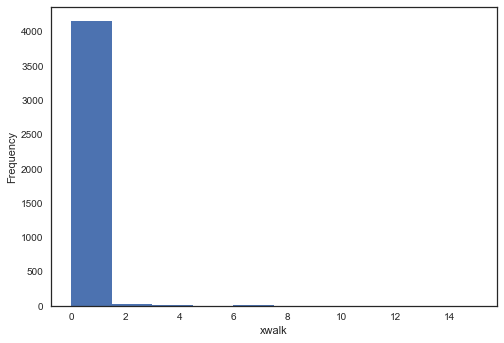

(array([4.18e+03, 1.00e+01, 3.00e+00, 0.00e+00, 0.00e+00, 1.00e+00,
        0.00e+00, 0.00e+00, 1.00e+00, 1.00e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

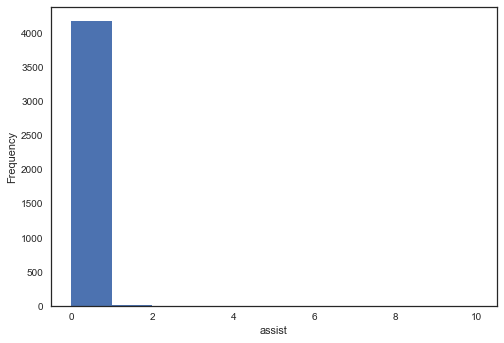

(array([4.112e+03, 6.100e+01, 1.600e+01, 0.000e+00, 4.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

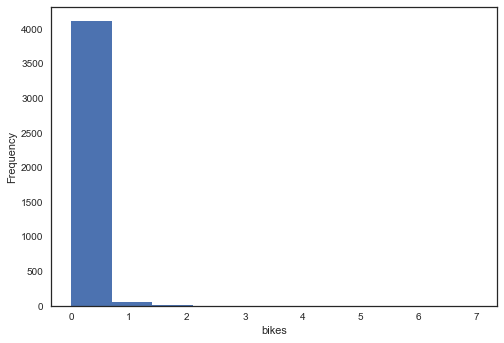

(array([4.107e+03, 5.800e+01, 8.000e+00, 1.000e+01, 8.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 2.000e+00]),
 array([ 0. ,  2.9,  5.8,  8.7, 11.6, 14.5, 17.4, 20.3, 23.2, 26.1, 29. ]),
 <a list of 10 Patch objects>)

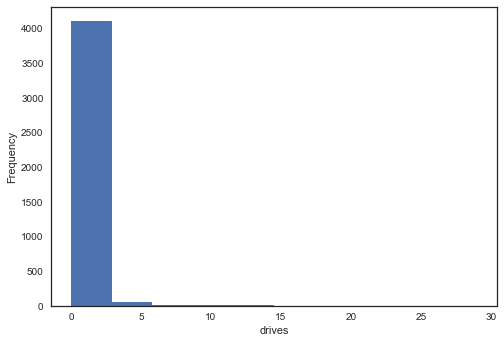

(array([4.123e+03, 5.000e+01, 8.000e+00, 0.000e+00, 4.000e+00, 5.000e+00,
        0.000e+00, 3.000e+00, 2.000e+00, 1.000e+00]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

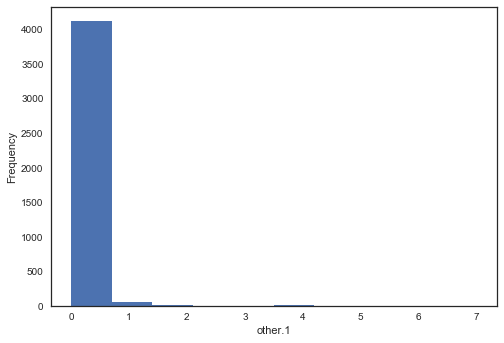

(array([4.113e+03, 4.100e+01, 2.000e+01, 8.000e+00, 3.000e+00, 3.000e+00,
        4.000e+00, 2.000e+00, 1.000e+00, 1.000e+00]),
 array([ 0. ,  5.1, 10.2, 15.3, 20.4, 25.5, 30.6, 35.7, 40.8, 45.9, 51. ]),
 <a list of 10 Patch objects>)

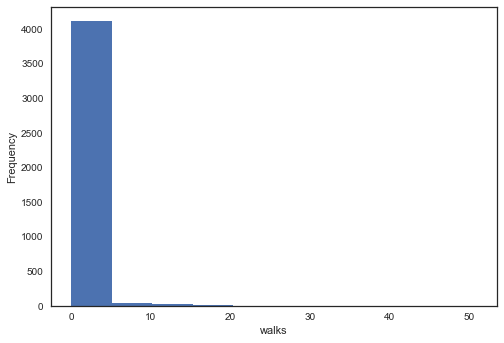

(array([  90.,  139.,  167.,  242., 2849.,  231.,  225.,  128.,   77.,
          48.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <a list of 10 Patch objects>)

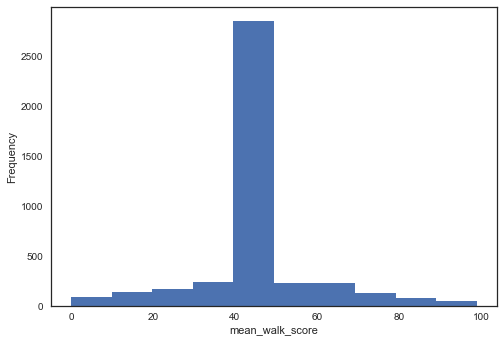

(array([ 144.,  143.,  167.,  241., 2847.,  224.,  199.,  122.,   68.,
          41.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <a list of 10 Patch objects>)

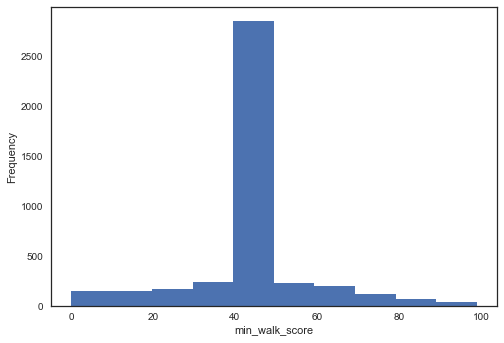

(array([  86.,  116.,  154.,  240., 2838.,  228.,  241.,  142.,   94.,
          57.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <a list of 10 Patch objects>)

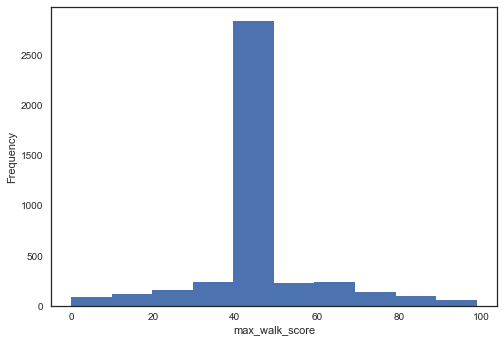

(array([4.191e+03, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([  0. ,  10.3,  20.6,  30.9,  41.2,  51.5,  61.8,  72.1,  82.4,
         92.7, 103. ]),
 <a list of 10 Patch objects>)

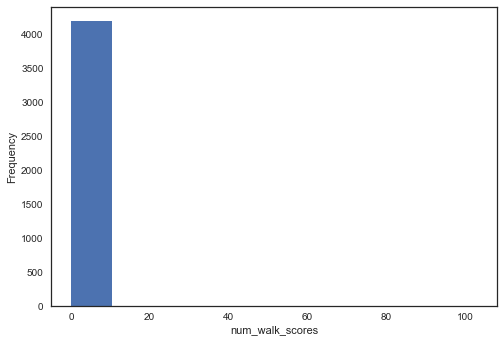

(array([4.022e+03, 1.500e+02, 1.600e+01, 2.000e+00, 5.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([   0. ,  249.8,  499.6,  749.4,  999.2, 1249. , 1498.8, 1748.6,
        1998.4, 2248.2, 2498. ]),
 <a list of 10 Patch objects>)

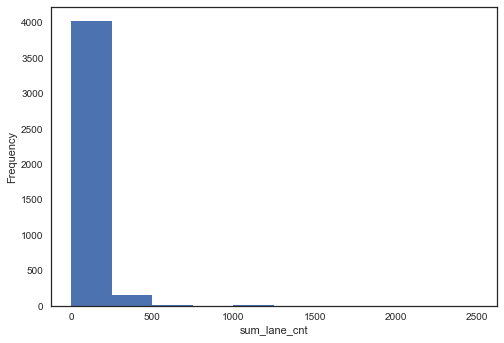

(array([3.959e+03, 1.960e+02, 3.100e+01, 3.000e+00, 5.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([1.3000e+01, 2.3280e+03, 4.6430e+03, 6.9580e+03, 9.2730e+03,
        1.1588e+04, 1.3903e+04, 1.6218e+04, 1.8533e+04, 2.0848e+04,
        2.3163e+04]),
 <a list of 10 Patch objects>)

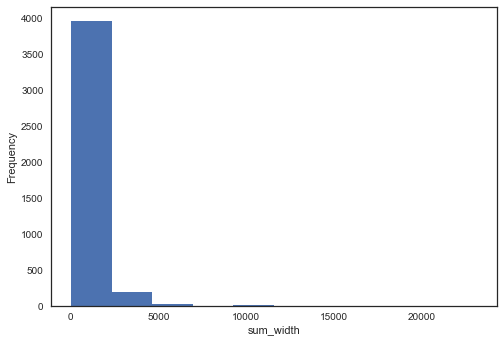

(array([4.007e+03, 1.320e+02, 2.900e+01, 1.600e+01, 6.000e+00, 4.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([2.32300000e+03, 2.67099140e+06, 5.33965980e+06, 8.00832820e+06,
        1.06769966e+07, 1.33456650e+07, 1.60143334e+07, 1.86830018e+07,
        2.13516702e+07, 2.40203386e+07, 2.66890070e+07]),
 <a list of 10 Patch objects>)

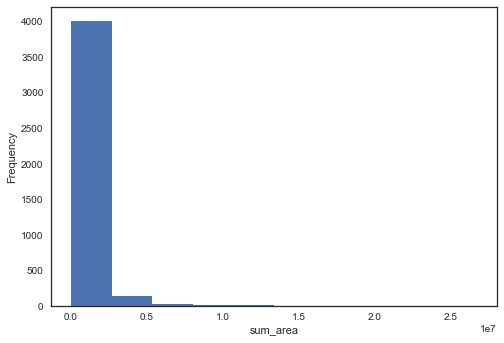

(array([3.625e+03, 4.790e+02, 6.500e+01, 1.800e+01, 5.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00]),
 array([  0. ,  47.9,  95.8, 143.7, 191.6, 239.5, 287.4, 335.3, 383.2,
        431.1, 479. ]),
 <a list of 10 Patch objects>)

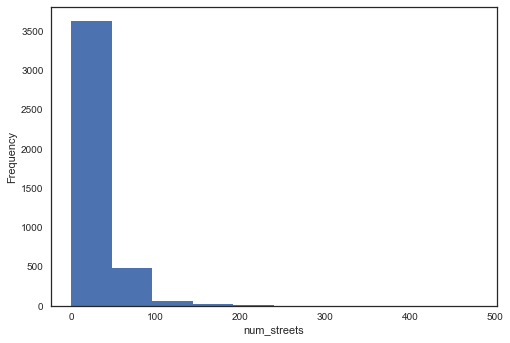

(array([4.029e+03, 7.900e+01, 4.300e+01, 3.400e+01, 7.000e+00, 1.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.]),
 <a list of 10 Patch objects>)

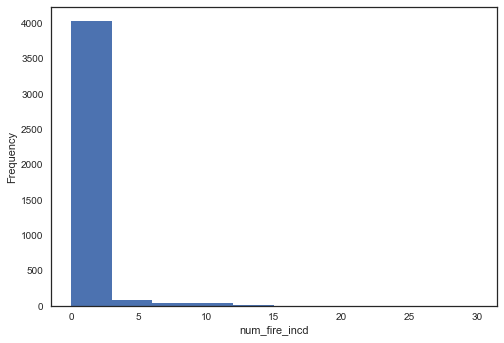

(array([4.079e+03, 9.500e+01, 1.800e+01, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00]),
 array([1.24300000e+01, 5.76011187e+05, 1.15200994e+06, 1.72800870e+06,
        2.30400746e+06, 2.88000622e+06, 3.45600497e+06, 4.03200373e+06,
        4.60800249e+06, 5.18400124e+06, 5.76000000e+06]),
 <a list of 10 Patch objects>)

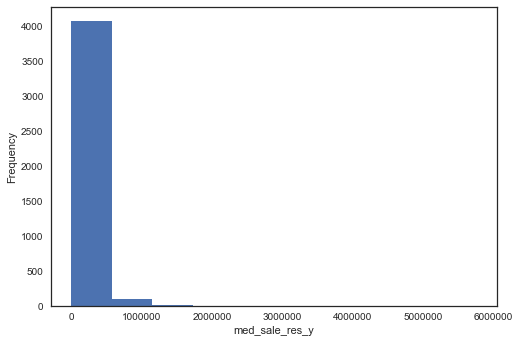

(array([4.192e+03, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([1.28000000e+01, 2.56001152e+06, 5.12001024e+06, 7.68000896e+06,
        1.02400077e+07, 1.28000064e+07, 1.53600051e+07, 1.79200038e+07,
        2.04800026e+07, 2.30400013e+07, 2.56000000e+07]),
 <a list of 10 Patch objects>)

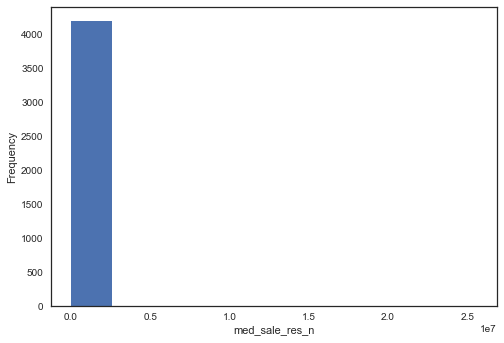

(array([4.149e+03, 3.000e+01, 5.000e+00, 1.000e+00, 1.000e+00, 2.000e+00,
        4.000e+00, 2.000e+00, 0.000e+00, 2.000e+00]),
 array([       0. ,  3876295.5,  7752591. , 11628886.5, 15505182. ,
        19381477.5, 23257773. , 27134068.5, 31010364. , 34886659.5,
        38762955. ]),
 <a list of 10 Patch objects>)

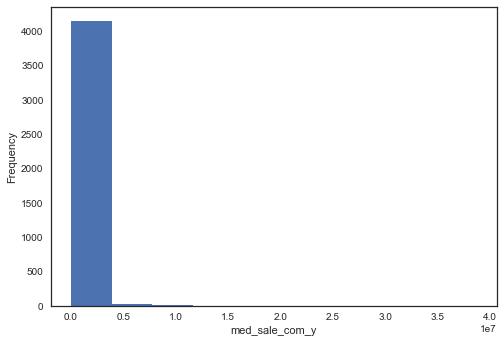

(array([4.165e+03, 6.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 7.000e+00,
        1.000e+00, 4.000e+00, 1.000e+00, 1.200e+01]),
 array([       0.,  2560000.,  5120000.,  7680000., 10240000., 12800000.,
        15360000., 17920000., 20480000., 23040000., 25600000.]),
 <a list of 10 Patch objects>)

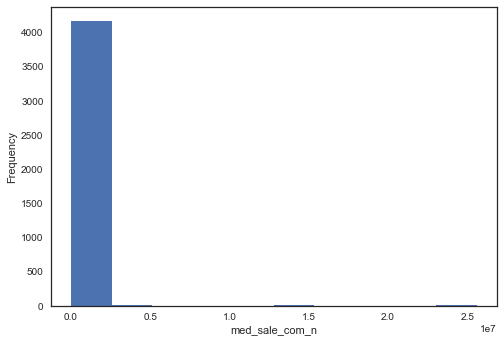

(array([4.161e+03, 2.000e+01, 8.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 1.000e+00, 1.000e+00]),
 array([       0.   ,  1910070.689,  3820141.378,  5730212.067,
         7640282.756,  9550353.445, 11460424.134, 13370494.823,
        15280565.512, 17190636.201, 19100706.89 ]),
 <a list of 10 Patch objects>)

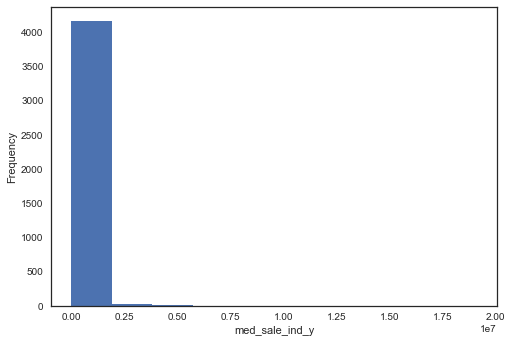

(array([4.188e+03, 4.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([       0.,  1220241.,  2440482.,  3660723.,  4880964.,  6101205.,
         7321446.,  8541687.,  9761928., 10982169., 12202410.]),
 <a list of 10 Patch objects>)

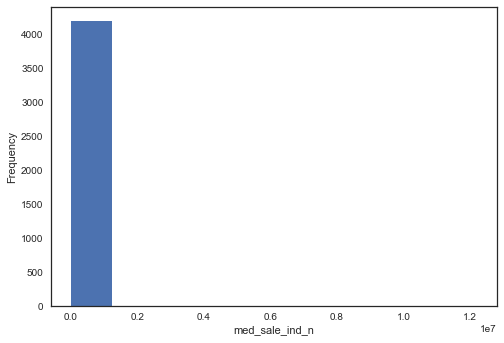

(array([4.192e+03, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([      0.,  189370.,  378740.,  568110.,  757480.,  946850.,
        1136220., 1325590., 1514960., 1704330., 1893700.]),
 <a list of 10 Patch objects>)

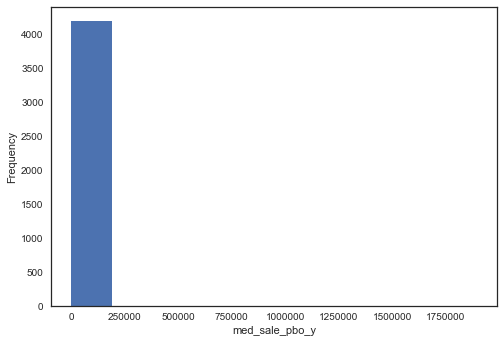

(array([   0.,    0.,    0.,    0.,    0., 4196.,    0.,    0.,    0.,
           0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

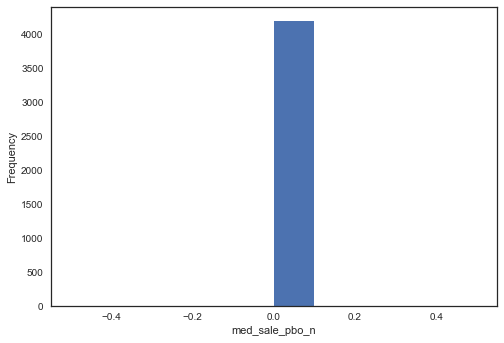

(array([3.684e+03, 3.150e+02, 1.140e+02, 4.900e+01, 2.300e+01, 6.000e+00,
        4.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([   0.    ,  915.8676, 1831.7352, 2747.6028, 3663.4704, 4579.338 ,
        5495.2056, 6411.0732, 7326.9408, 8242.8084, 9158.676 ]),
 <a list of 10 Patch objects>)

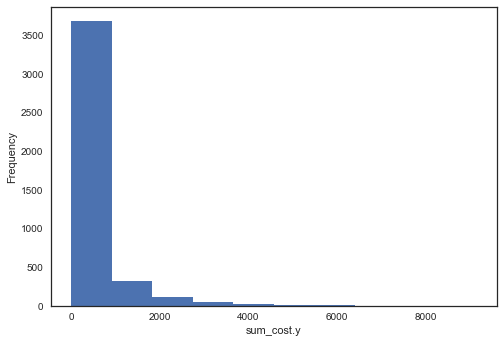

(array([3.651e+03, 3.350e+02, 1.240e+02, 5.400e+01, 2.100e+01, 6.000e+00,
        3.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([  0. ,  99.3, 198.6, 297.9, 397.2, 496.5, 595.8, 695.1, 794.4,
        893.7, 993. ]),
 <a list of 10 Patch objects>)

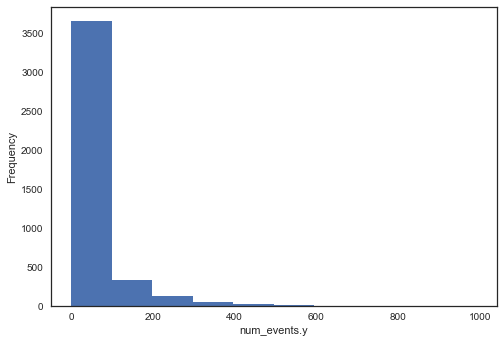

(array([3020.,  720.,  198.,   58.,   60.,   48.,   32.,   26.,   17.,
          17.]),
 array([2.10000000e-05, 4.34691380e-03, 8.67282760e-03, 1.29987414e-02,
        1.73246552e-02, 2.16505690e-02, 2.59764828e-02, 3.03023966e-02,
        3.46283104e-02, 3.89542242e-02, 4.32801380e-02]),
 <a list of 10 Patch objects>)

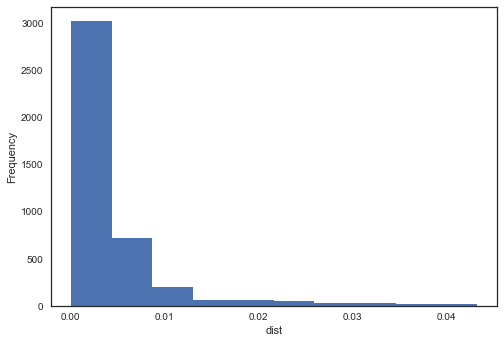

(array([1.884e+03, 1.539e+03, 6.100e+02, 1.320e+02, 1.900e+01, 3.000e+00,
        3.000e+00, 2.000e+00, 1.000e+00, 3.000e+00]),
 array([ 1. ,  5.7, 10.4, 15.1, 19.8, 24.5, 29.2, 33.9, 38.6, 43.3, 48. ]),
 <a list of 10 Patch objects>)

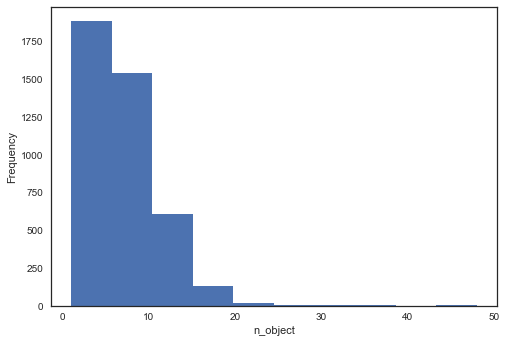

(array([3.764e+03, 2.740e+02, 8.100e+01, 4.100e+01, 1.300e+01, 1.300e+01,
        6.000e+00, 1.000e+00, 1.000e+00, 2.000e+00]),
 array([ 0. ,  5.6, 11.2, 16.8, 22.4, 28. , 33.6, 39.2, 44.8, 50.4, 56. ]),
 <a list of 10 Patch objects>)

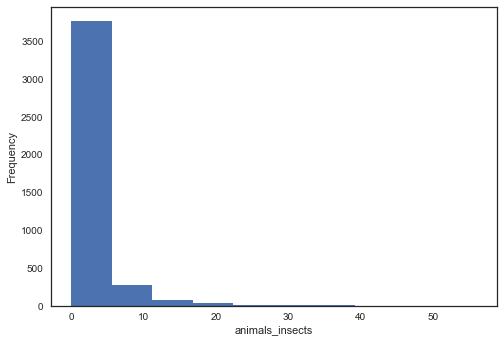

(array([3.658e+03, 3.410e+02, 1.090e+02, 5.100e+01, 1.700e+01, 1.100e+01,
        2.000e+00, 4.000e+00, 1.000e+00, 2.000e+00]),
 array([  0. ,  34.3,  68.6, 102.9, 137.2, 171.5, 205.8, 240.1, 274.4,
        308.7, 343. ]),
 <a list of 10 Patch objects>)

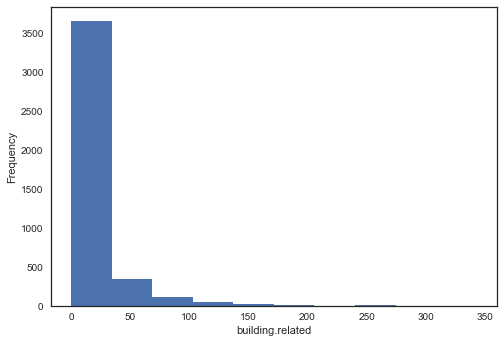

(array([4.041e+03, 1.030e+02, 4.300e+01, 4.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([ 0. ,  1.4,  2.8,  4.2,  5.6,  7. ,  8.4,  9.8, 11.2, 12.6, 14. ]),
 <a list of 10 Patch objects>)

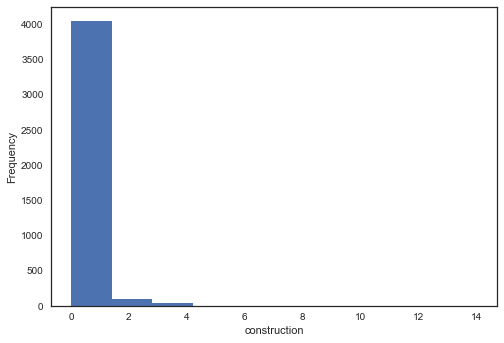

(array([4.013e+03, 9.000e+01, 5.500e+01, 1.700e+01, 9.000e+00, 5.000e+00,
        2.000e+00, 1.000e+00, 1.000e+00, 3.000e+00]),
 array([ 0. ,  3.7,  7.4, 11.1, 14.8, 18.5, 22.2, 25.9, 29.6, 33.3, 37. ]),
 <a list of 10 Patch objects>)

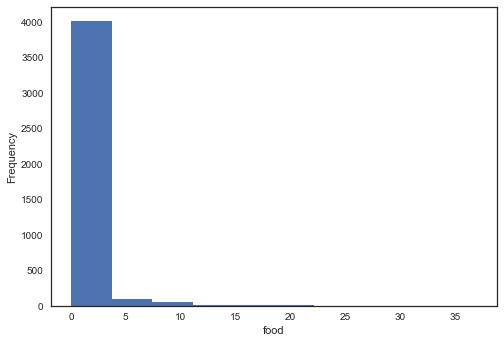

(array([3.843e+03, 2.920e+02, 4.400e+01, 1.200e+01, 4.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([   0. ,  118.4,  236.8,  355.2,  473.6,  592. ,  710.4,  828.8,
         947.2, 1065.6, 1184. ]),
 <a list of 10 Patch objects>)

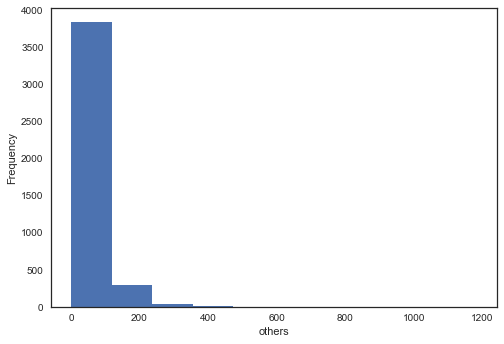

(array([3.876e+03, 2.530e+02, 4.600e+01, 1.300e+01, 4.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0. ,  7.7, 15.4, 23.1, 30.8, 38.5, 46.2, 53.9, 61.6, 69.3, 77. ]),
 <a list of 10 Patch objects>)

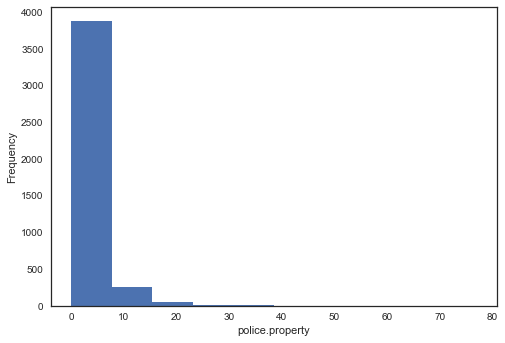

(array([3.558e+03, 4.150e+02, 1.470e+02, 4.900e+01, 1.800e+01, 5.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0. ,  2.2,  4.4,  6.6,  8.8, 11. , 13.2, 15.4, 17.6, 19.8, 22. ]),
 <a list of 10 Patch objects>)

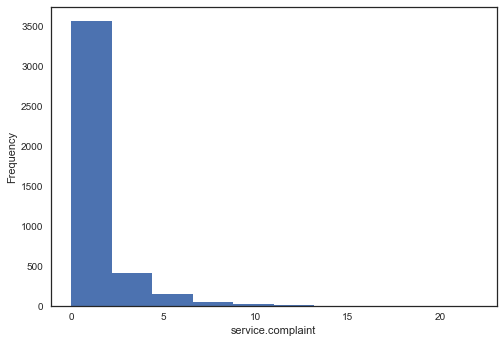

(array([2561.,  827.,  402.,  208.,  103.,   44.,   30.,   12.,    6.,
           3.]),
 array([  0. ,  11.9,  23.8,  35.7,  47.6,  59.5,  71.4,  83.3,  95.2,
        107.1, 119. ]),
 <a list of 10 Patch objects>)

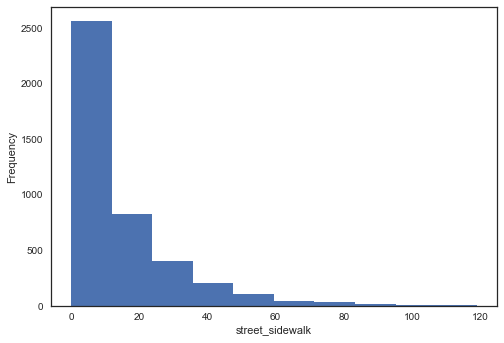

(array([3.50e+03, 4.51e+02, 1.45e+02, 5.90e+01, 1.70e+01, 1.00e+01,
        6.00e+00, 2.00e+00, 3.00e+00, 3.00e+00]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

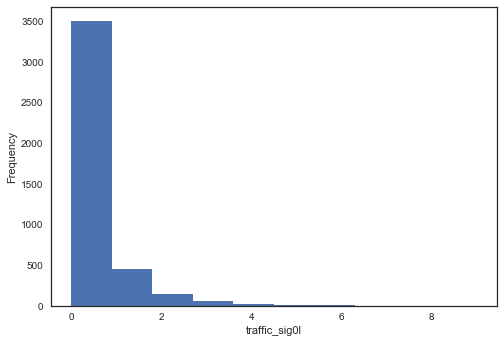

(array([2.757e+03, 7.650e+02, 4.280e+02, 1.660e+02, 5.200e+01, 1.500e+01,
        7.000e+00, 3.000e+00, 1.000e+00, 2.000e+00]),
 array([  0. ,  72.7, 145.4, 218.1, 290.8, 363.5, 436.2, 508.9, 581.6,
        654.3, 727. ]),
 <a list of 10 Patch objects>)

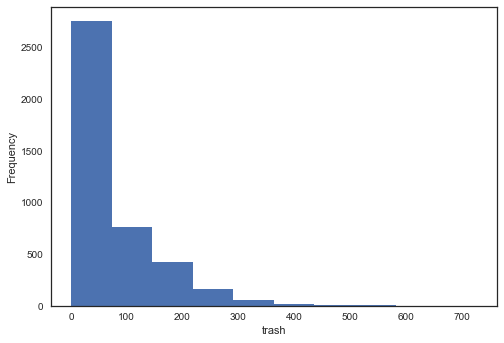

(array([3.38e+03, 4.55e+02, 1.66e+02, 8.40e+01, 5.30e+01, 2.90e+01,
        1.80e+01, 6.00e+00, 1.00e+00, 4.00e+00]),
 array([ 0. ,  8.7, 17.4, 26.1, 34.8, 43.5, 52.2, 60.9, 69.6, 78.3, 87. ]),
 <a list of 10 Patch objects>)

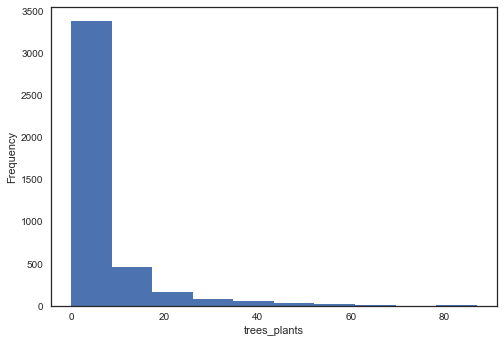

(array([3.942e+03, 1.470e+02, 8.000e+01, 1.100e+01, 1.100e+01, 2.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <a list of 10 Patch objects>)

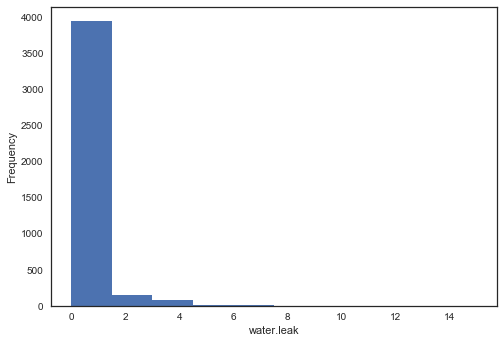

(array([3.949e+03, 1.490e+02, 5.000e+01, 2.600e+01, 6.000e+00, 1.000e+01,
        2.000e+00, 2.000e+00, 0.000e+00, 2.000e+00]),
 array([ 0. ,  3.6,  7.2, 10.8, 14.4, 18. , 21.6, 25.2, 28.8, 32.4, 36. ]),
 <a list of 10 Patch objects>)

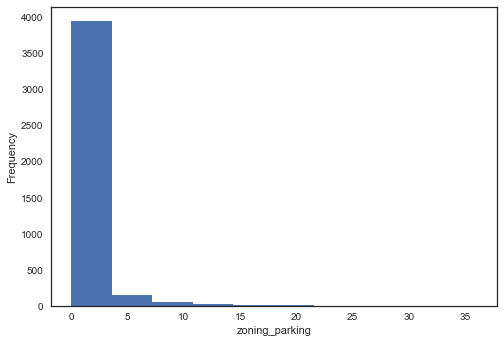

(array([2.612e+03, 8.350e+02, 4.300e+02, 1.860e+02, 7.400e+01, 3.100e+01,
        2.200e+01, 1.000e+00, 3.000e+00, 2.000e+00]),
 array([   0. ,  140.9,  281.8,  422.7,  563.6,  704.5,  845.4,  986.3,
        1127.2, 1268.1, 1409. ]),
 <a list of 10 Patch objects>)

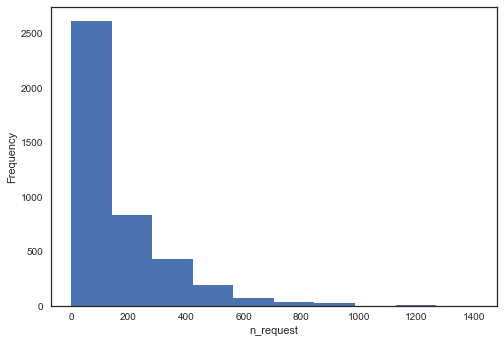

In [54]:
for col in numeric_col_names:
    #print(col)
    plt.hist(df[col], bins = 10)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
    #save plots for later use
    plot_type = "Frequency_"
    plot_name = str(col)
    data_file_ext = ".png"
    plt_file_2_save = data_dir + plot_type + plot_name + data_file_ext
    plt.savefig(plt_file_2_save)
    
    #plt.title("Frequency distribution of ",col)
    plt.show()

### Log transformation for all numeric columns

(array([3588.,   90.,  283.,   74.,   33.,   12.,    7.,   82.,   13.,
          14.]),
 array([0.        , 0.33817087, 0.67634174, 1.01451261, 1.35268348,
        1.69085435, 2.02902522, 2.36719609, 2.70536696, 3.04353783,
        3.38170871]),
 <a list of 10 Patch objects>)

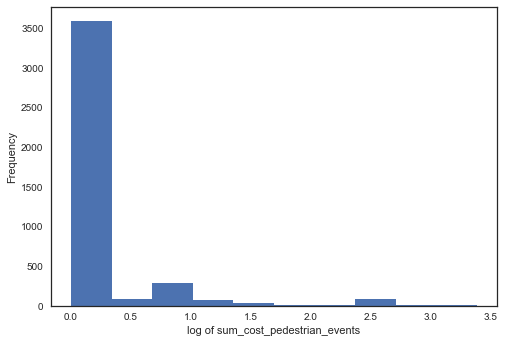

(array([  20.,   13.,   51.,   85.,  152.,  496.,  443.,  803., 1692.,
         441.]),
 array([ 9.90413734, 10.33714813, 10.77015892, 11.20316971, 11.6361805 ,
        12.06919129, 12.50220208, 12.93521287, 13.36822366, 13.80123445,
        14.23424523]),
 <a list of 10 Patch objects>)

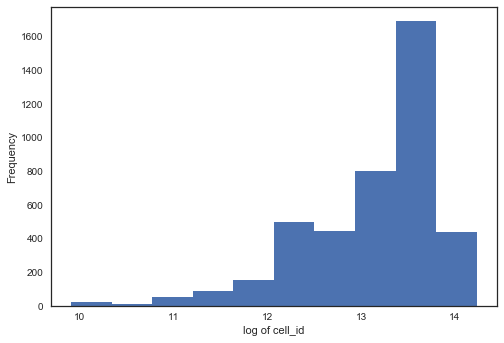

(array([4.137e+03, 0.000e+00, 4.900e+01, 0.000e+00, 6.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([0.        , 0.24849066, 0.49698133, 0.74547199, 0.99396266,
        1.24245332, 1.49094399, 1.73943465, 1.98792532, 2.23641598,
        2.48490665]),
 <a list of 10 Patch objects>)

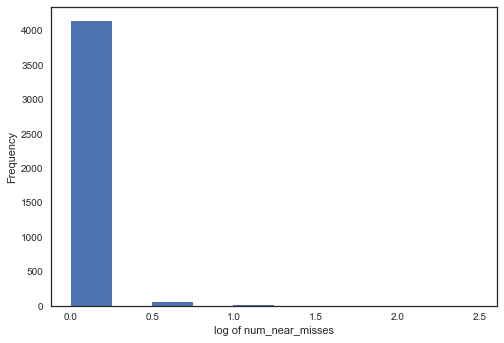

(array([3641.,  178.,  107.,  100.,   86.,   30.,   31.,   13.,    6.,
           4.]),
 array([0.        , 0.44188406, 0.88376812, 1.32565218, 1.76753624,
        2.2094203 , 2.65130436, 3.09318843, 3.53507249, 3.97695655,
        4.41884061]),
 <a list of 10 Patch objects>)

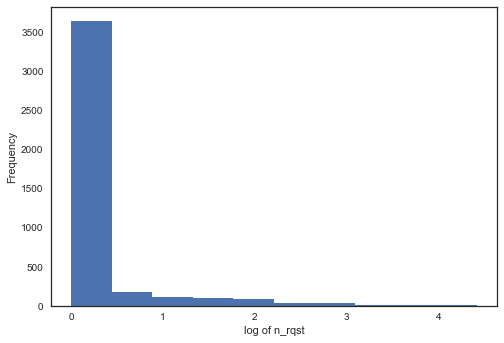

(array([4.178e+03, 0.000e+00, 0.000e+00, 1.300e+01, 0.000e+00, 1.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([0.        , 0.20794415, 0.41588831, 0.62383246, 0.83177662,
        1.03972077, 1.24766493, 1.45560908, 1.66355323, 1.87149739,
        2.07944154]),
 <a list of 10 Patch objects>)

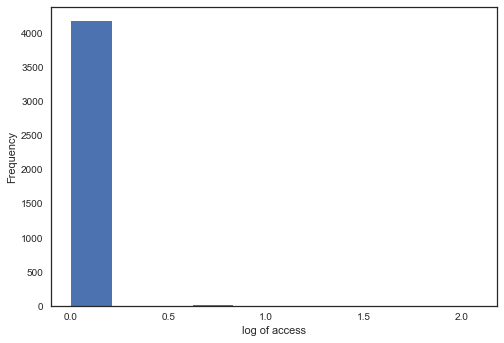

(array([4.167e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.900e+01,
        0.000e+00, 9.000e+00, 0.000e+00, 1.000e+00]),
 array([0.        , 0.13862944, 0.27725887, 0.41588831, 0.55451774,
        0.69314718, 0.83177662, 0.97040605, 1.10903549, 1.24766493,
        1.38629436]),
 <a list of 10 Patch objects>)

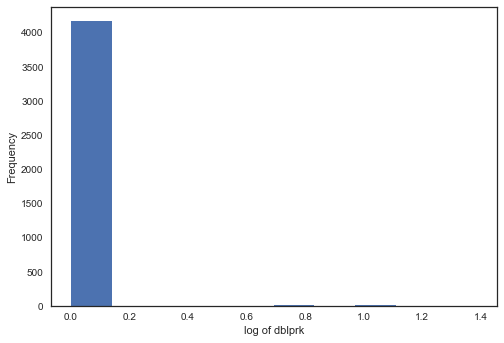

(array([4.073e+03, 6.000e+01, 2.200e+01, 8.000e+00, 1.100e+01, 1.200e+01,
        3.000e+00, 3.000e+00, 2.000e+00, 2.000e+00]),
 array([0.        , 0.37376696, 0.74753392, 1.12130089, 1.49506785,
        1.86883481, 2.24260177, 2.61636873, 2.99013569, 3.36390266,
        3.73766962]),
 <a list of 10 Patch objects>)

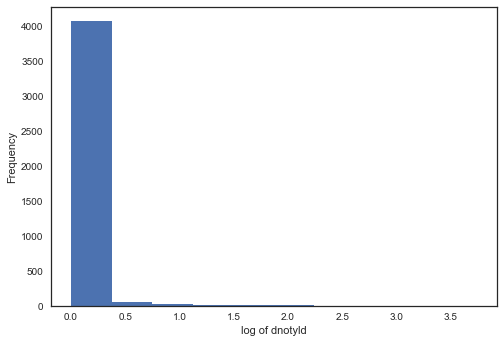

(array([4.132e+03, 0.000e+00, 0.000e+00, 3.900e+01, 1.400e+01, 0.000e+00,
        8.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([0.        , 0.23025851, 0.46051702, 0.69077553, 0.92103404,
        1.15129255, 1.38155106, 1.61180957, 1.84206807, 2.07232658,
        2.30258509]),
 <a list of 10 Patch objects>)

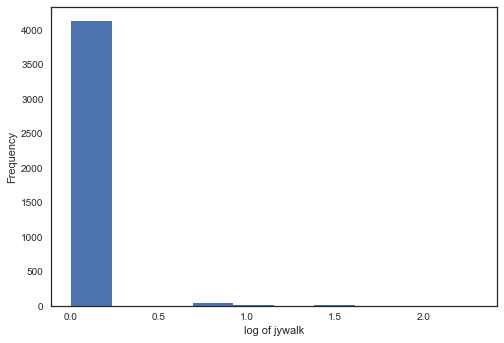

(array([4.094e+03, 0.000e+00, 0.000e+00, 6.700e+01, 0.000e+00, 1.900e+01,
        9.000e+00, 3.000e+00, 3.000e+00, 1.000e+00]),
 array([0.        , 0.21972246, 0.43944492, 0.65916737, 0.87888983,
        1.09861229, 1.31833475, 1.5380572 , 1.75777966, 1.97750212,
        2.19722458]),
 <a list of 10 Patch objects>)

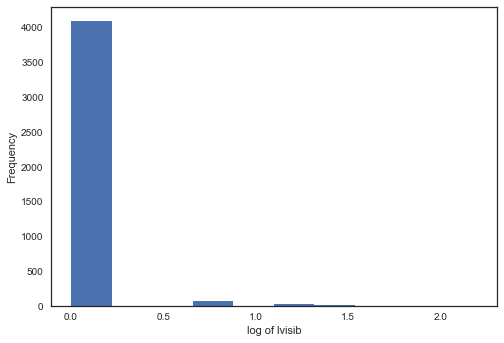

(array([4.169e+03, 0.000e+00, 0.000e+00, 2.000e+01, 0.000e+00, 2.000e+00,
        3.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([0.        , 0.20794415, 0.41588831, 0.62383246, 0.83177662,
        1.03972077, 1.24766493, 1.45560908, 1.66355323, 1.87149739,
        2.07944154]),
 <a list of 10 Patch objects>)

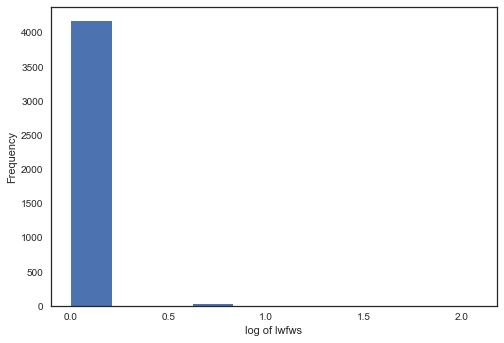

(array([4.158e+03, 0.000e+00, 0.000e+00, 0.000e+00, 2.900e+01, 0.000e+00,
        7.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([0.        , 0.16094379, 0.32188758, 0.48283137, 0.64377516,
        0.80471896, 0.96566275, 1.12660654, 1.28755033, 1.44849412,
        1.60943791]),
 <a list of 10 Patch objects>)

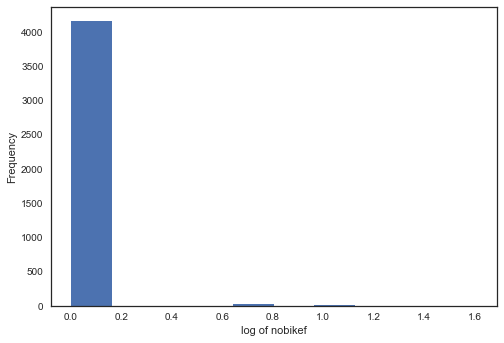

(array([4.131e+03, 0.000e+00, 3.600e+01, 1.100e+01, 1.100e+01, 2.000e+00,
        2.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([0.        , 0.32958369, 0.65916737, 0.98875106, 1.31833475,
        1.64791843, 1.97750212, 2.30708581, 2.63666949, 2.96625318,
        3.29583687]),
 <a list of 10 Patch objects>)

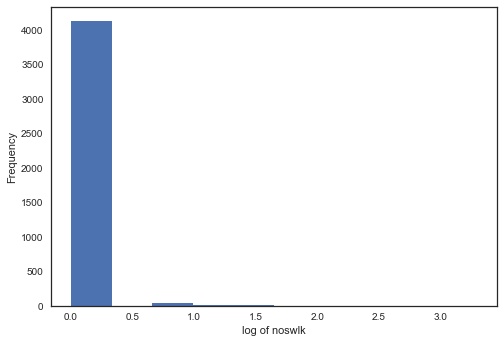

(array([4.019e+03, 0.000e+00, 1.130e+02, 3.400e+01, 1.400e+01, 8.000e+00,
        2.000e+00, 1.000e+00, 4.000e+00, 1.000e+00]),
 array([0.        , 0.30910425, 0.61820849, 0.92731274, 1.23641698,
        1.54552123, 1.85462547, 2.16372972, 2.47283396, 2.78193821,
        3.09104245]),
 <a list of 10 Patch objects>)

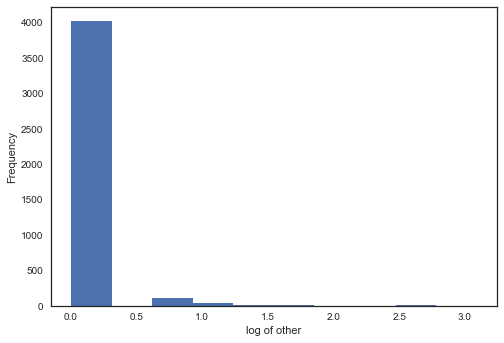

(array([4.123e+03, 0.000e+00, 0.000e+00, 5.200e+01, 0.000e+00, 0.000e+00,
        1.500e+01, 3.000e+00, 2.000e+00, 1.000e+00]),
 array([0.        , 0.17917595, 0.35835189, 0.53752784, 0.71670379,
        0.89587973, 1.07505568, 1.25423163, 1.43340758, 1.61258352,
        1.79175947]),
 <a list of 10 Patch objects>)

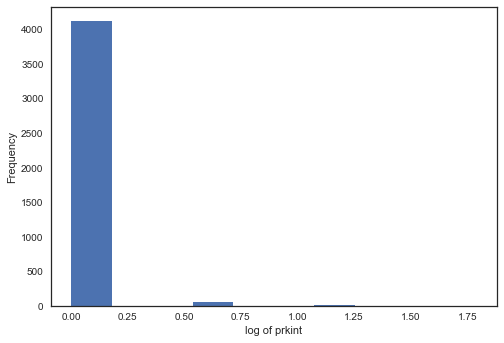

(array([4.143e+03, 0.000e+00, 0.000e+00, 4.200e+01, 0.000e+00, 4.000e+00,
        3.000e+00, 2.000e+00, 1.000e+00, 1.000e+00]),
 array([0.        , 0.21972246, 0.43944492, 0.65916737, 0.87888983,
        1.09861229, 1.31833475, 1.5380572 , 1.75777966, 1.97750212,
        2.19722458]),
 <a list of 10 Patch objects>)

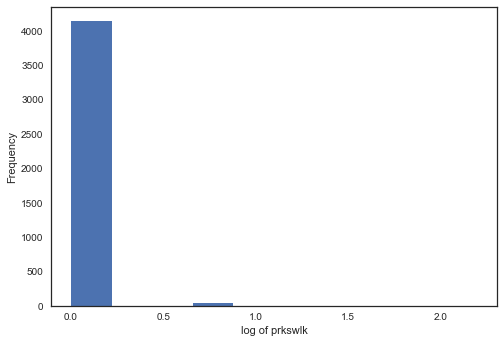

(array([3902.,    0.,  148.,   59.,   34.,   24.,   12.,    7.,    5.,
           5.]),
 array([0.        , 0.30445224, 0.60890449, 0.91335673, 1.21780898,
        1.52226122, 1.82671346, 2.13116571, 2.43561795, 2.74007019,
        3.04452244]),
 <a list of 10 Patch objects>)

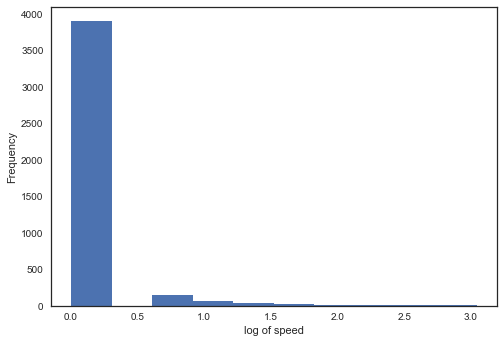

(array([4.059e+03, 0.000e+00, 9.100e+01, 1.300e+01, 9.000e+00, 6.000e+00,
        7.000e+00, 4.000e+00, 3.000e+00, 4.000e+00]),
 array([0.        , 0.2944439 , 0.5888878 , 0.88333169, 1.17777559,
        1.47221949, 1.76666339, 2.06110729, 2.35555118, 2.64999508,
        2.94443898]),
 <a list of 10 Patch objects>)

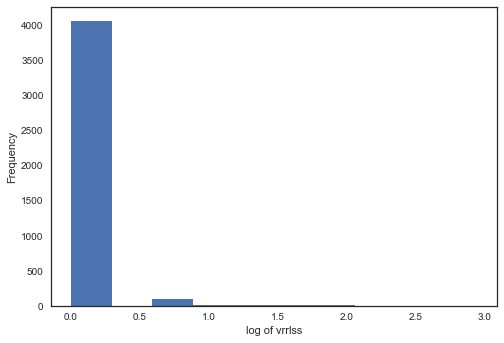

(array([4.169e+03, 0.000e+00, 0.000e+00, 1.600e+01, 0.000e+00, 0.000e+00,
        8.000e+00, 0.000e+00, 2.000e+00, 1.000e+00]),
 array([0.        , 0.17917595, 0.35835189, 0.53752784, 0.71670379,
        0.89587973, 1.07505568, 1.25423163, 1.43340758, 1.61258352,
        1.79175947]),
 <a list of 10 Patch objects>)

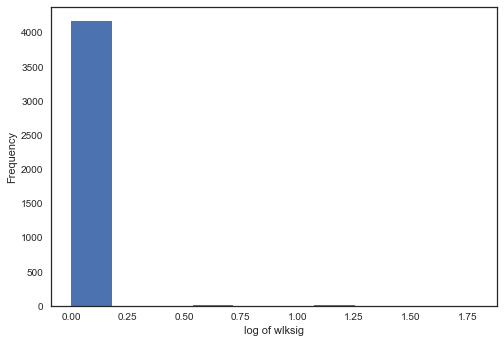

(array([4.084e+03, 0.000e+00, 7.000e+01, 1.900e+01, 0.000e+00, 1.000e+01,
        2.000e+00, 8.000e+00, 0.000e+00, 3.000e+00]),
 array([0.        , 0.27725887, 0.55451774, 0.83177662, 1.10903549,
        1.38629436, 1.66355323, 1.94081211, 2.21807098, 2.49532985,
        2.77258872]),
 <a list of 10 Patch objects>)

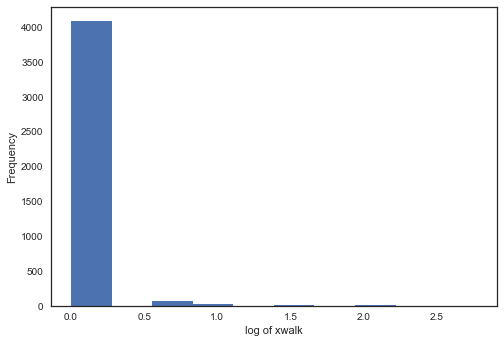

(array([4.18e+03, 0.00e+00, 1.00e+01, 0.00e+00, 3.00e+00, 0.00e+00,
        0.00e+00, 1.00e+00, 0.00e+00, 2.00e+00]),
 array([0.        , 0.23978953, 0.47957905, 0.71936858, 0.95915811,
        1.19894764, 1.43873716, 1.67852669, 1.91831622, 2.15810575,
        2.39789527]),
 <a list of 10 Patch objects>)

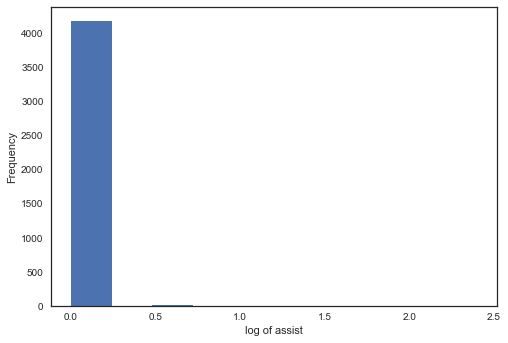

(array([4.112e+03, 0.000e+00, 0.000e+00, 6.100e+01, 0.000e+00, 1.600e+01,
        4.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([0.        , 0.20794415, 0.41588831, 0.62383246, 0.83177662,
        1.03972077, 1.24766493, 1.45560908, 1.66355323, 1.87149739,
        2.07944154]),
 <a list of 10 Patch objects>)

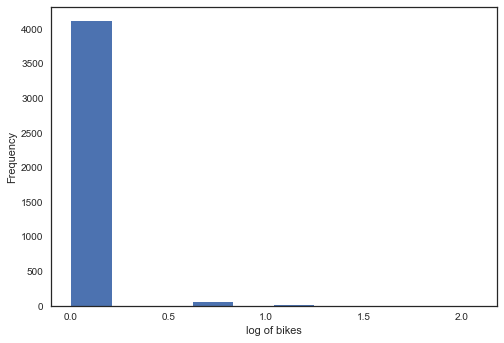

(array([3.874e+03, 0.000e+00, 1.590e+02, 7.400e+01, 4.900e+01, 1.200e+01,
        8.000e+00, 1.500e+01, 2.000e+00, 3.000e+00]),
 array([0.        , 0.34011974, 0.68023948, 1.02035921, 1.36047895,
        1.70059869, 2.04071843, 2.38083817, 2.72095791, 3.06107764,
        3.40119738]),
 <a list of 10 Patch objects>)

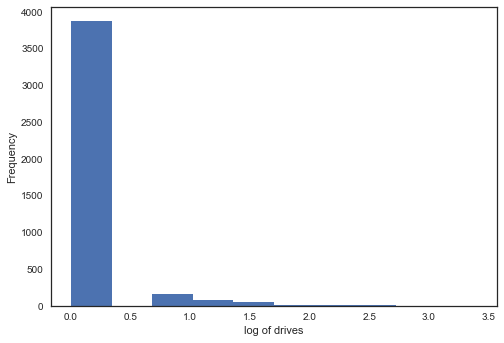

(array([4.123e+03, 0.000e+00, 0.000e+00, 5.000e+01, 0.000e+00, 8.000e+00,
        4.000e+00, 5.000e+00, 3.000e+00, 3.000e+00]),
 array([0.        , 0.20794415, 0.41588831, 0.62383246, 0.83177662,
        1.03972077, 1.24766493, 1.45560908, 1.66355323, 1.87149739,
        2.07944154]),
 <a list of 10 Patch objects>)

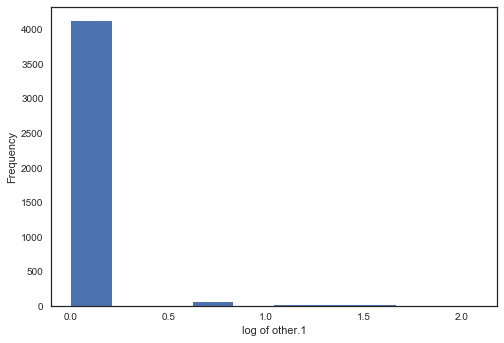

(array([3794.,  155.,   64.,   49.,   65.,   22.,   23.,   12.,    8.,
           4.]),
 array([0.        , 0.39512437, 0.79024874, 1.18537312, 1.58049749,
        1.97562186, 2.37074623, 2.7658706 , 3.16099497, 3.55611935,
        3.95124372]),
 <a list of 10 Patch objects>)

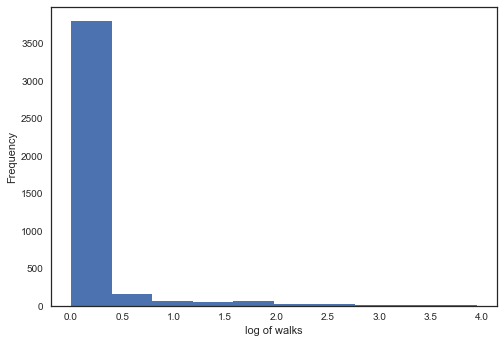

(array([2.000e+00, 8.000e+00, 1.200e+01, 1.900e+01, 3.900e+01, 7.600e+01,
        1.490e+02, 3.130e+02, 3.179e+03, 3.990e+02]),
 array([0.        , 0.46051702, 0.92103404, 1.38155106, 1.84206807,
        2.30258509, 2.76310211, 3.22361913, 3.68413615, 4.14465317,
        4.60517019]),
 <a list of 10 Patch objects>)

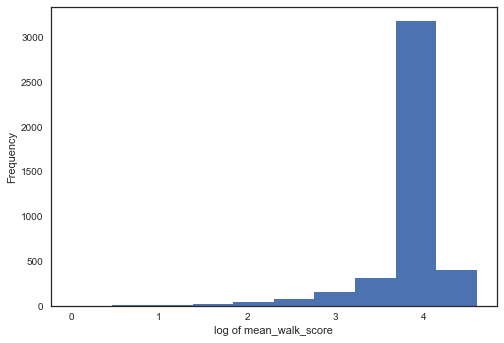

(array([   4.,   10.,   27.,   36.,   56.,   81.,  147.,  308., 3161.,
         366.]),
 array([0.        , 0.46051702, 0.92103404, 1.38155106, 1.84206807,
        2.30258509, 2.76310211, 3.22361913, 3.68413615, 4.14465317,
        4.60517019]),
 <a list of 10 Patch objects>)

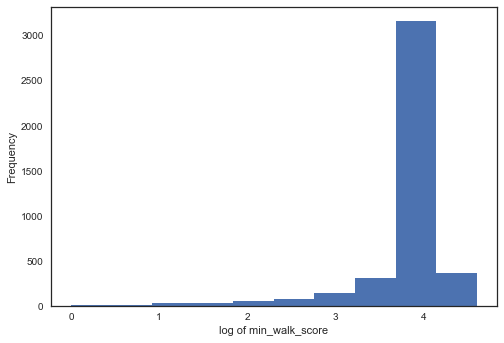

(array([2.000e+00, 8.000e+00, 1.100e+01, 2.000e+01, 3.500e+01, 6.000e+01,
        1.400e+02, 2.970e+02, 3.168e+03, 4.550e+02]),
 array([0.        , 0.46051702, 0.92103404, 1.38155106, 1.84206807,
        2.30258509, 2.76310211, 3.22361913, 3.68413615, 4.14465317,
        4.60517019]),
 <a list of 10 Patch objects>)

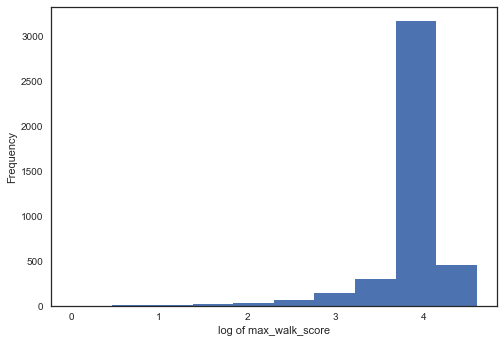

(array([2.569e+03, 9.730e+02, 5.800e+02, 6.100e+01, 8.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 2.000e+00]),
 array([0.        , 0.46443909, 0.92887818, 1.39331727, 1.85775636,
        2.32219545, 2.78663454, 3.25107363, 3.71551272, 4.17995181,
        4.6443909 ]),
 <a list of 10 Patch objects>)

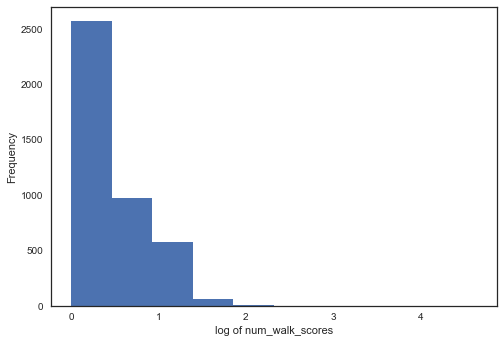

(array([   4.,  102.,  262.,  341.,  787., 1908.,  603.,  168.,   18.,
           3.]),
 array([0.        , 0.78236459, 1.56472919, 2.34709378, 3.12945837,
        3.91182297, 4.69418756, 5.47655215, 6.25891674, 7.04128134,
        7.82364593]),
 <a list of 10 Patch objects>)

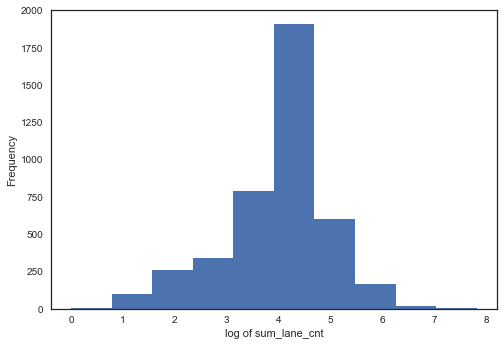

(array([  80.,  162.,  202.,  401., 1775.,  815.,  559.,  172.,   27.,
           3.]),
 array([ 2.63905733,  3.38018706,  4.12131679,  4.86244652,  5.60357625,
         6.34470598,  7.08583571,  7.82696544,  8.56809517,  9.3092249 ,
        10.05035463]),
 <a list of 10 Patch objects>)

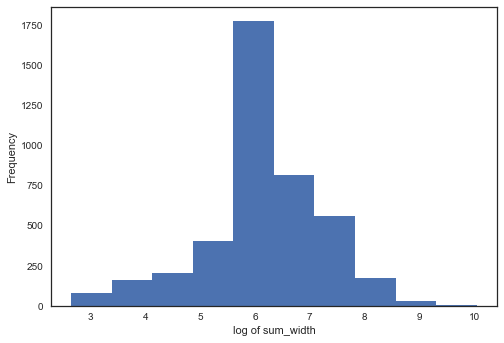

(array([  13.,   52.,  142.,  365.,  877., 1782.,  589.,  287.,   75.,
          14.]),
 array([ 7.75104512,  8.68591684,  9.62078857, 10.55566029, 11.49053201,
        12.42540374, 13.36027546, 14.29514718, 15.23001891, 16.16489063,
        17.09976235]),
 <a list of 10 Patch objects>)

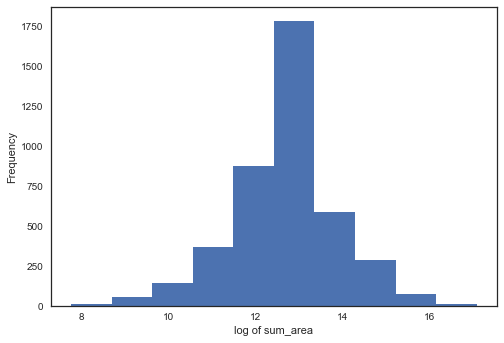

(array([1019.,  278.,  265.,  424.,  712.,  746.,  553.,  169.,   26.,
           4.]),
 array([0.        , 0.61737861, 1.23475722, 1.85213583, 2.46951444,
        3.08689305, 3.70427166, 4.32165027, 4.93902888, 5.55640749,
        6.1737861 ]),
 <a list of 10 Patch objects>)

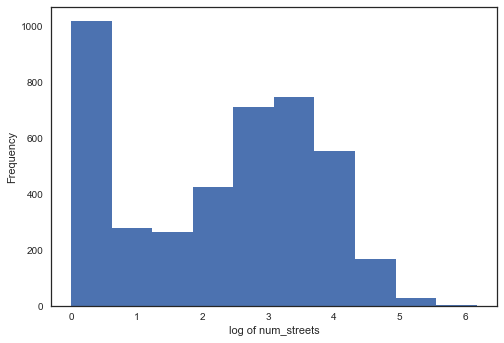

(array([3.95e+03, 0.00e+00, 4.40e+01, 3.50e+01, 6.80e+01, 1.50e+01,
        6.60e+01, 1.40e+01, 1.00e+00, 3.00e+00]),
 array([0.        , 0.34339872, 0.68679744, 1.03019616, 1.37359488,
        1.7169936 , 2.06039232, 2.40379104, 2.74718976, 3.09058848,
        3.4339872 ]),
 <a list of 10 Patch objects>)

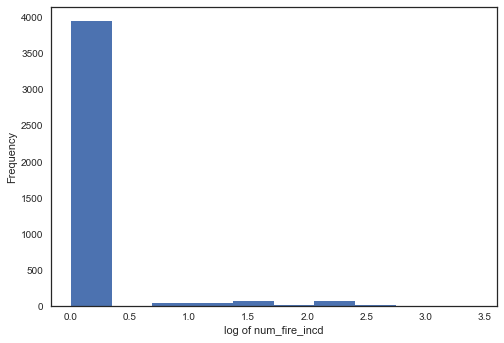

(array([1.000e+00, 0.000e+00, 3.000e+00, 1.000e+01, 1.010e+02, 7.490e+02,
        2.020e+03, 1.117e+03, 1.900e+02, 5.000e+00]),
 array([ 2.59749101,  3.89438673,  5.19128245,  6.48817817,  7.78507389,
         9.08196961, 10.37886533, 11.67576105, 12.97265677, 14.26955249,
        15.56644821]),
 <a list of 10 Patch objects>)

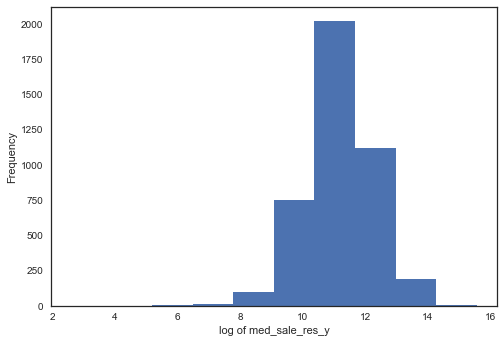

(array([   3.,    0.,    6.,   13.,  345., 2368., 1405.,   50.,    3.,
           3.]),
 array([ 2.62466859,  4.06801203,  5.51135546,  6.9546989 ,  8.39804233,
         9.84138577, 11.28472921, 12.72807264, 14.17141608, 15.61475951,
        17.05810295]),
 <a list of 10 Patch objects>)

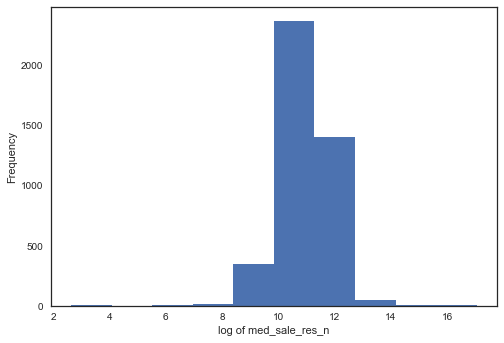

(array([2.889e+03, 1.000e+00, 1.000e+00, 3.000e+00, 1.700e+01, 1.500e+02,
        5.680e+02, 4.360e+02, 1.060e+02, 2.500e+01]),
 array([ 0.        ,  1.74729756,  3.49459512,  5.24189268,  6.98919024,
         8.7364878 , 10.48378536, 12.23108292, 13.97838049, 15.72567805,
        17.47297561]),
 <a list of 10 Patch objects>)

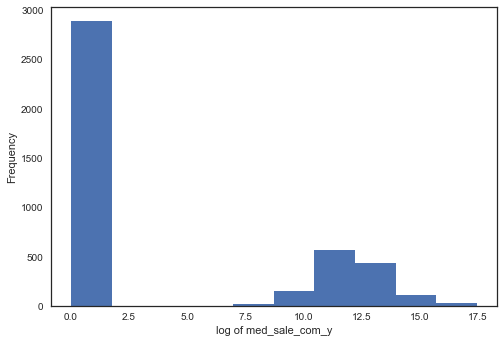

(array([3.56e+03, 4.00e+00, 0.00e+00, 1.00e+00, 1.30e+01, 6.10e+01,
        3.56e+02, 1.49e+02, 2.70e+01, 2.50e+01]),
 array([ 0.        ,  1.70581029,  3.41162059,  5.11743088,  6.82324118,
         8.52905147, 10.23486177, 11.94067206, 13.64648236, 15.35229265,
        17.05810295]),
 <a list of 10 Patch objects>)

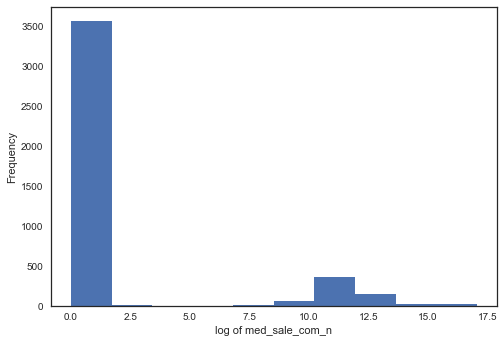

(array([3.942e+03, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 7.000e+00,
        3.500e+01, 1.190e+02, 7.500e+01, 1.500e+01]),
 array([ 0.        ,  1.6765236 ,  3.35304719,  5.02957079,  6.70609438,
         8.38261798, 10.05914157, 11.73566517, 13.41218876, 15.08871236,
        16.76523595]),
 <a list of 10 Patch objects>)

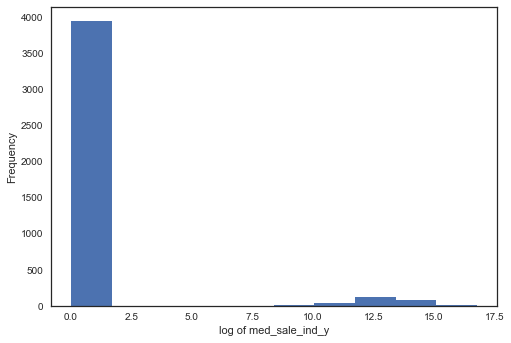

(array([4.151e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        7.000e+00, 2.200e+01, 1.100e+01, 4.000e+00]),
 array([ 0.        ,  1.63171441,  3.26342882,  4.89514323,  6.52685765,
         8.15857206,  9.79028647, 11.42200088, 13.05371529, 14.6854297 ,
        16.31714411]),
 <a list of 10 Patch objects>)

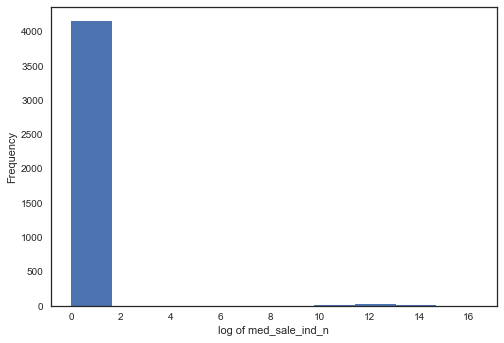

(array([4.189e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 3.000e+00, 0.000e+00, 4.000e+00]),
 array([ 0.        ,  1.44540437,  2.89080873,  4.3362131 ,  5.78161747,
         7.22702184,  8.6724262 , 10.11783057, 11.56323494, 13.00863931,
        14.45404367]),
 <a list of 10 Patch objects>)

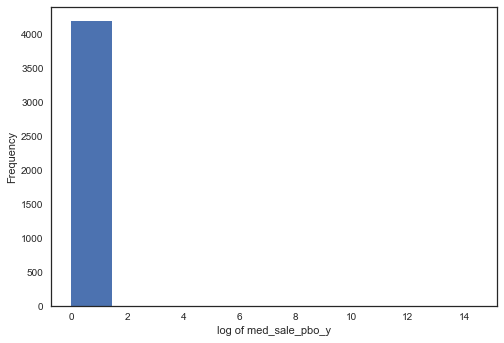

(array([   0.,    0.,    0.,    0.,    0., 4196.,    0.,    0.,    0.,
           0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

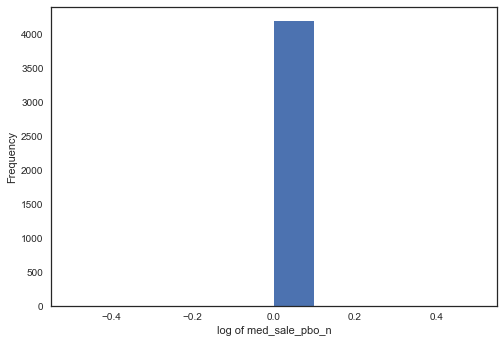

(array([655.,   2., 244., 392., 624., 741., 748., 516., 241.,  33.]),
 array([0.        , 0.91225661, 1.82451322, 2.73676983, 3.64902643,
        4.56128304, 5.47353965, 6.38579626, 7.29805287, 8.21030948,
        9.12256609]),
 <a list of 10 Patch objects>)

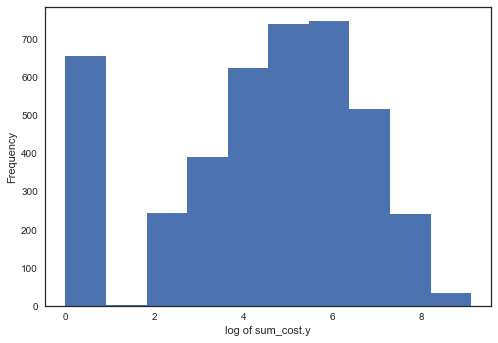

(array([627., 422., 491., 581., 630., 583., 451., 271., 129.,  11.]),
 array([0.        , 0.69017372, 1.38034744, 2.07052116, 2.76069488,
        3.4508686 , 4.14104232, 4.83121604, 5.52138977, 6.21156349,
        6.90173721]),
 <a list of 10 Patch objects>)

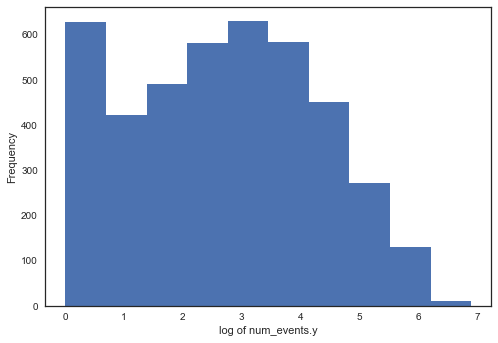

(array([3000.,  724.,  212.,   54.,   63.,   48.,   32.,   29.,   17.,
          17.]),
 array([2.09997795e-05, 4.25587267e-03, 8.49074555e-03, 1.27256184e-02,
        1.69604913e-02, 2.11953642e-02, 2.54302371e-02, 2.96651100e-02,
        3.38999829e-02, 3.81348558e-02, 4.23697286e-02]),
 <a list of 10 Patch objects>)

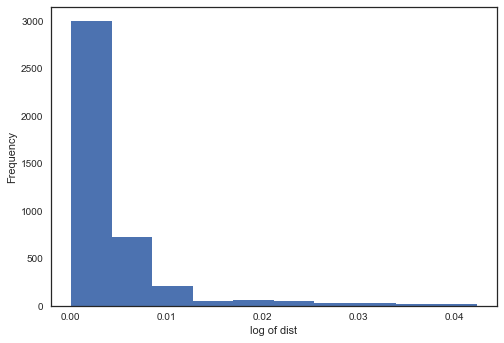

(array([ 515.,  769.,  148., 1751.,  219.,  564.,  152.,   66.,    6.,
           6.]),
 array([0.69314718, 1.01301449, 1.3328818 , 1.65274912, 1.97261643,
        2.29248374, 2.61235105, 2.93221836, 3.25208567, 3.57195299,
        3.8918203 ]),
 <a list of 10 Patch objects>)

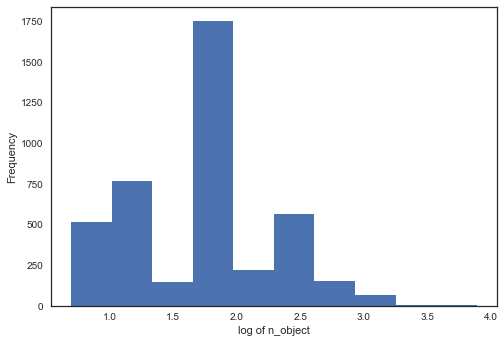

(array([2637.,  456.,  279.,  295.,  167.,  178.,   95.,   61.,   22.,
           6.]),
 array([0.        , 0.40430513, 0.80861025, 1.21291538, 1.61722051,
        2.02152563, 2.42583076, 2.83013589, 3.23444101, 3.63874614,
        4.04305127]),
 <a list of 10 Patch objects>)

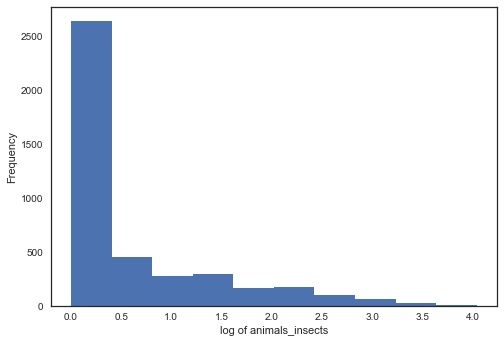

(array([1385.,  579.,  315.,  474.,  457.,  418.,  294.,  196.,   64.,
          14.]),
 array([0.        , 0.58406417, 1.16812833, 1.7521925 , 2.33625666,
        2.92032083, 3.50438499, 4.08844916, 4.67251333, 5.25657749,
        5.84064166]),
 <a list of 10 Patch objects>)

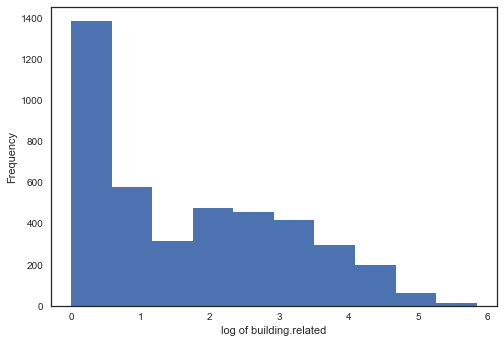

(array([3.636e+03, 0.000e+00, 4.050e+02, 0.000e+00, 1.030e+02, 4.300e+01,
        4.000e+00, 2.000e+00, 1.000e+00, 2.000e+00]),
 array([0.        , 0.27080502, 0.54161004, 0.81241506, 1.08322008,
        1.3540251 , 1.62483012, 1.89563514, 2.16644016, 2.43724518,
        2.7080502 ]),
 <a list of 10 Patch objects>)

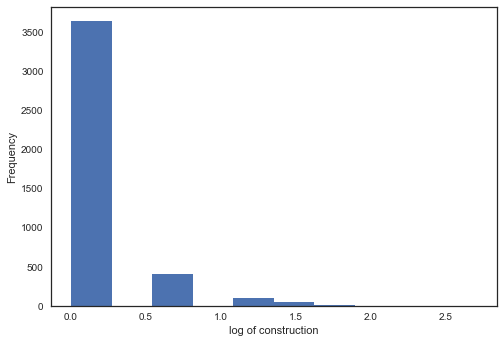

(array([3721.,  160.,    0.,  132.,   59.,   31.,   55.,   22.,   11.,
           5.]),
 array([0.        , 0.36375862, 0.72751723, 1.09127585, 1.45503446,
        1.81879308, 2.1825517 , 2.54631031, 2.91006893, 3.27382754,
        3.63758616]),
 <a list of 10 Patch objects>)

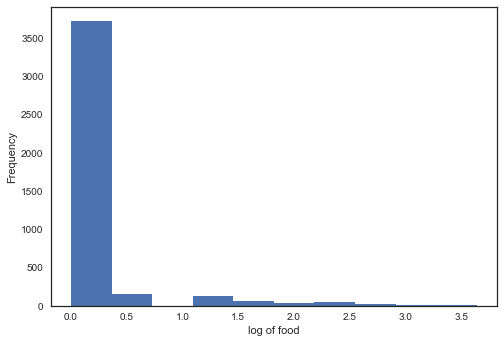

(array([957., 242., 300., 448., 698., 731., 566., 224.,  29.,   1.]),
 array([0.        , 0.70774981, 1.41549961, 2.12324942, 2.83099922,
        3.53874903, 4.24649883, 4.95424864, 5.66199844, 6.36974825,
        7.07749805]),
 <a list of 10 Patch objects>)

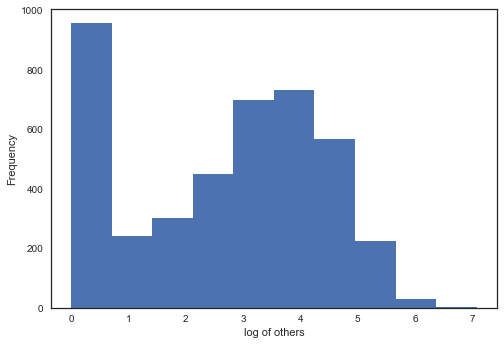

(array([2.417e+03, 4.640e+02, 2.830e+02, 4.260e+02, 2.860e+02, 2.020e+02,
        9.000e+01, 2.000e+01, 6.000e+00, 2.000e+00]),
 array([0.        , 0.43567088, 0.87134177, 1.30701265, 1.74268353,
        2.17835441, 2.6140253 , 3.04969618, 3.48536706, 3.92103794,
        4.35670883]),
 <a list of 10 Patch objects>)

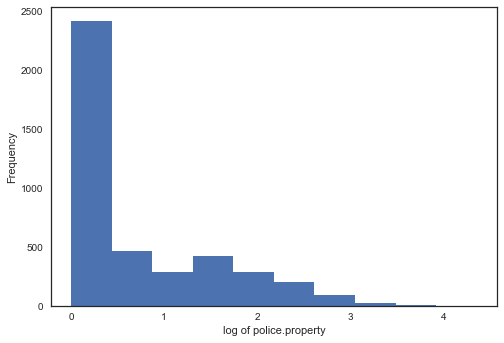

(array([2.501e+03, 0.000e+00, 6.690e+02, 3.880e+02, 2.610e+02, 2.410e+02,
        9.100e+01, 3.900e+01, 4.000e+00, 2.000e+00]),
 array([0.        , 0.31354942, 0.62709884, 0.94064826, 1.25419769,
        1.56774711, 1.88129653, 2.19484595, 2.50839537, 2.82194479,
        3.13549422]),
 <a list of 10 Patch objects>)

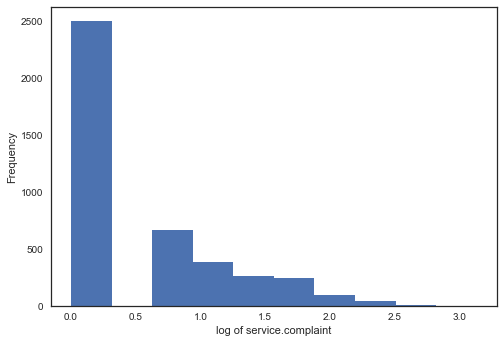

(array([989., 295., 352., 276., 463., 585., 603., 411., 178.,  44.]),
 array([0.        , 0.47874917, 0.95749835, 1.43624752, 1.9149967 ,
        2.39374587, 2.87249505, 3.35124422, 3.82999339, 4.30874257,
        4.78749174]),
 <a list of 10 Patch objects>)

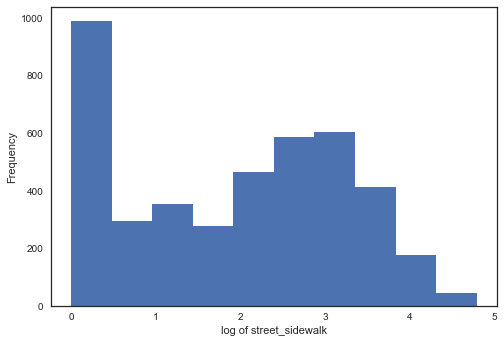

(array([3500.,    0.,    0.,  451.,  145.,    0.,   76.,   10.,    6.,
           8.]),
 array([0.        , 0.23025851, 0.46051702, 0.69077553, 0.92103404,
        1.15129255, 1.38155106, 1.61180957, 1.84206807, 2.07232658,
        2.30258509]),
 <a list of 10 Patch objects>)

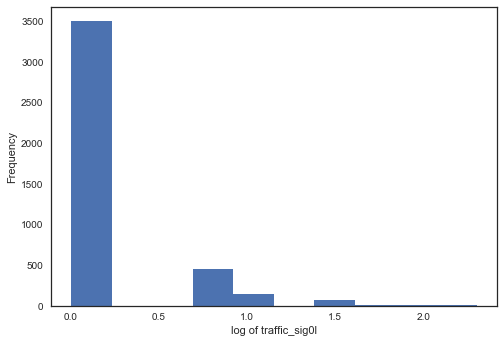

(array([1272.,  227.,  152.,  147.,  261.,  398.,  614.,  772.,  329.,
          24.]),
 array([0.        , 0.6590301 , 1.31806021, 1.97709031, 2.63612042,
        3.29515052, 3.95418063, 4.61321073, 5.27224084, 5.93127094,
        6.59030105]),
 <a list of 10 Patch objects>)

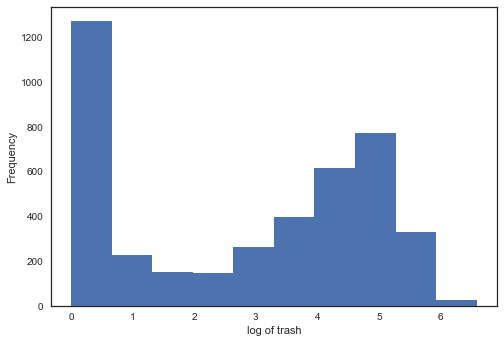

(array([1952.,  375.,  256.,  366.,  431.,  293.,  260.,  152.,   90.,
          21.]),
 array([0.        , 0.44773368, 0.89546736, 1.34320104, 1.79093473,
        2.23866841, 2.68640209, 3.13413577, 3.58186945, 4.02960313,
        4.47733681]),
 <a list of 10 Patch objects>)

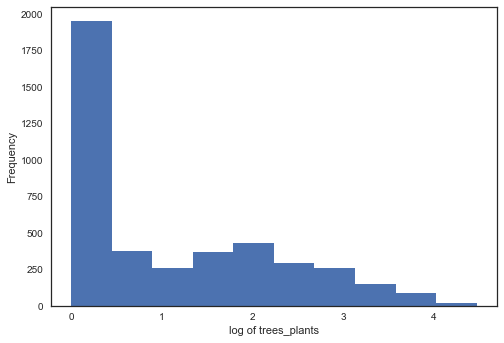

(array([3.487e+03, 0.000e+00, 4.550e+02, 1.470e+02, 0.000e+00, 8.000e+01,
        1.100e+01, 1.300e+01, 2.000e+00, 1.000e+00]),
 array([0.        , 0.27725887, 0.55451774, 0.83177662, 1.10903549,
        1.38629436, 1.66355323, 1.94081211, 2.21807098, 2.49532985,
        2.77258872]),
 <a list of 10 Patch objects>)

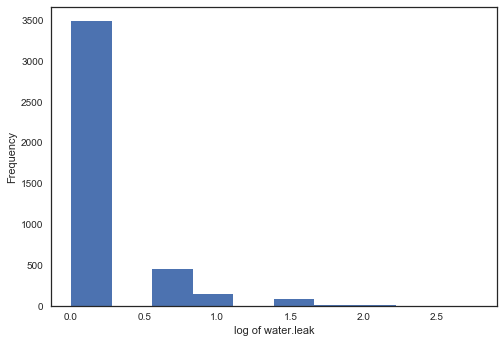

(array([3206.,  428.,    0.,  315.,  109.,   40.,   58.,   23.,   13.,
           4.]),
 array([0.        , 0.36109179, 0.72218358, 1.08327537, 1.44436717,
        1.80545896, 2.16655075, 2.52764254, 2.88873433, 3.24982612,
        3.61091791]),
 <a list of 10 Patch objects>)

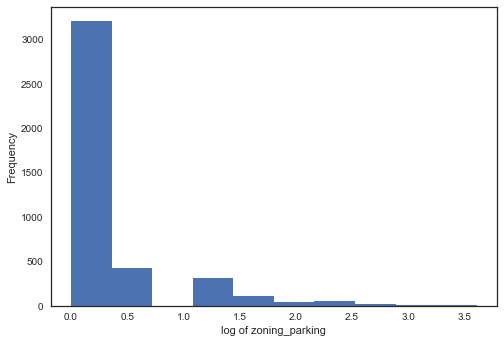

(array([740., 128., 174., 249., 306., 475., 686., 873., 496.,  69.]),
 array([0.        , 0.7251345 , 1.450269  , 2.1754035 , 2.90053799,
        3.62567249, 4.35080699, 5.07594149, 5.80107599, 6.52621049,
        7.25134498]),
 <a list of 10 Patch objects>)

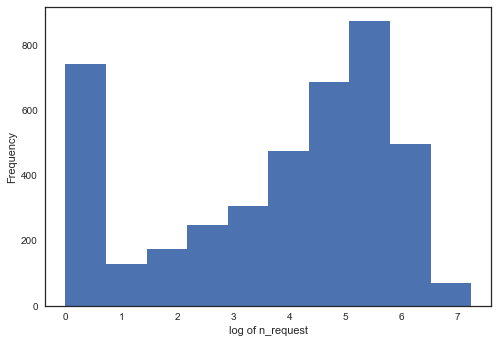

In [55]:
for col in numeric_col_names:
    #print(col)
    plt.hist(np.log(1+ df[col]), bins = 10)
    plt.xlabel('log of '+ col)
    plt.ylabel('Frequency')
    
    #save plots for later use
    plot_type = "Log_Frequency_"
    plot_name = str(col)
    data_file_ext = ".png"
    plt_file_2_save = data_dir + plot_type + plot_name + data_file_ext
    plt.savefig(plt_file_2_save)
    
    
    #plt.title("Frequency distribution of ",col)
    plt.show()

In [56]:
from IPython.display import Image
from IPython.display import HTML
html_content = "<Table><tr><td>Original Data</td><td>Log Transformed</td></tr>"
for col in numeric_col_names:

    plot_name = str(col)
    data_file_ext = ".png"

    image_loc = "../plots/EDA/"
    l_plot_type = "Log_Frequency_"
    F_plot_type = "Frequency_"

    l_plt_file_2_save = image_loc + l_plot_type + plot_name + data_file_ext
    F_plt_file_2_save = image_loc + F_plot_type + plot_name + data_file_ext

    #Image(plt_file_2_save) 
    #Image(plt_file_2_save)
    
    #html_content = html_content + "<tr><td><img src="+ l_plt_file_2_save+"</td></tr>"
    html_content = html_content + "<tr><td><img src= '"+F_plt_file_2_save+"' </td><td><img src= '"+l_plt_file_2_save+"'</td></tr>"
    #print(html_content)

html_content = html_content + "</table>"
HTML(html_content)


Original Data,Log Transformed
<img src= '../plots/EDA/Frequency_sum_cost_pedestrian_events.png',<img src= '../plots/EDA/Log_Frequency_sum_cost_pedestrian_events.png'
<img src= '../plots/EDA/Frequency_cell_id.png',<img src= '../plots/EDA/Log_Frequency_cell_id.png'
<img src= '../plots/EDA/Frequency_num_near_misses.png',<img src= '../plots/EDA/Log_Frequency_num_near_misses.png'
<img src= '../plots/EDA/Frequency_n_rqst.png',<img src= '../plots/EDA/Log_Frequency_n_rqst.png'
<img src= '../plots/EDA/Frequency_access.png',<img src= '../plots/EDA/Log_Frequency_access.png'
<img src= '../plots/EDA/Frequency_dblprk.png',<img src= '../plots/EDA/Log_Frequency_dblprk.png'
<img src= '../plots/EDA/Frequency_dnotyld.png',<img src= '../plots/EDA/Log_Frequency_dnotyld.png'
<img src= '../plots/EDA/Frequency_jywalk.png',<img src= '../plots/EDA/Log_Frequency_jywalk.png'
<img src= '../plots/EDA/Frequency_lvisib.png',<img src= '../plots/EDA/Log_Frequency_lvisib.png'
<img src= '../plots/EDA/Frequency_lwfws.png',<img src= '../plots/EDA/Log_Frequency_lwfws.png'


C:\Users\Preeti\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.
C:\Users\Preeti\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))
C:\Users\Preeti\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3193: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002898C57A1D0>,
        ...,
        ...,
        ...,
       ...,
        ...,
        ...,
        ...,
      dtype=object)

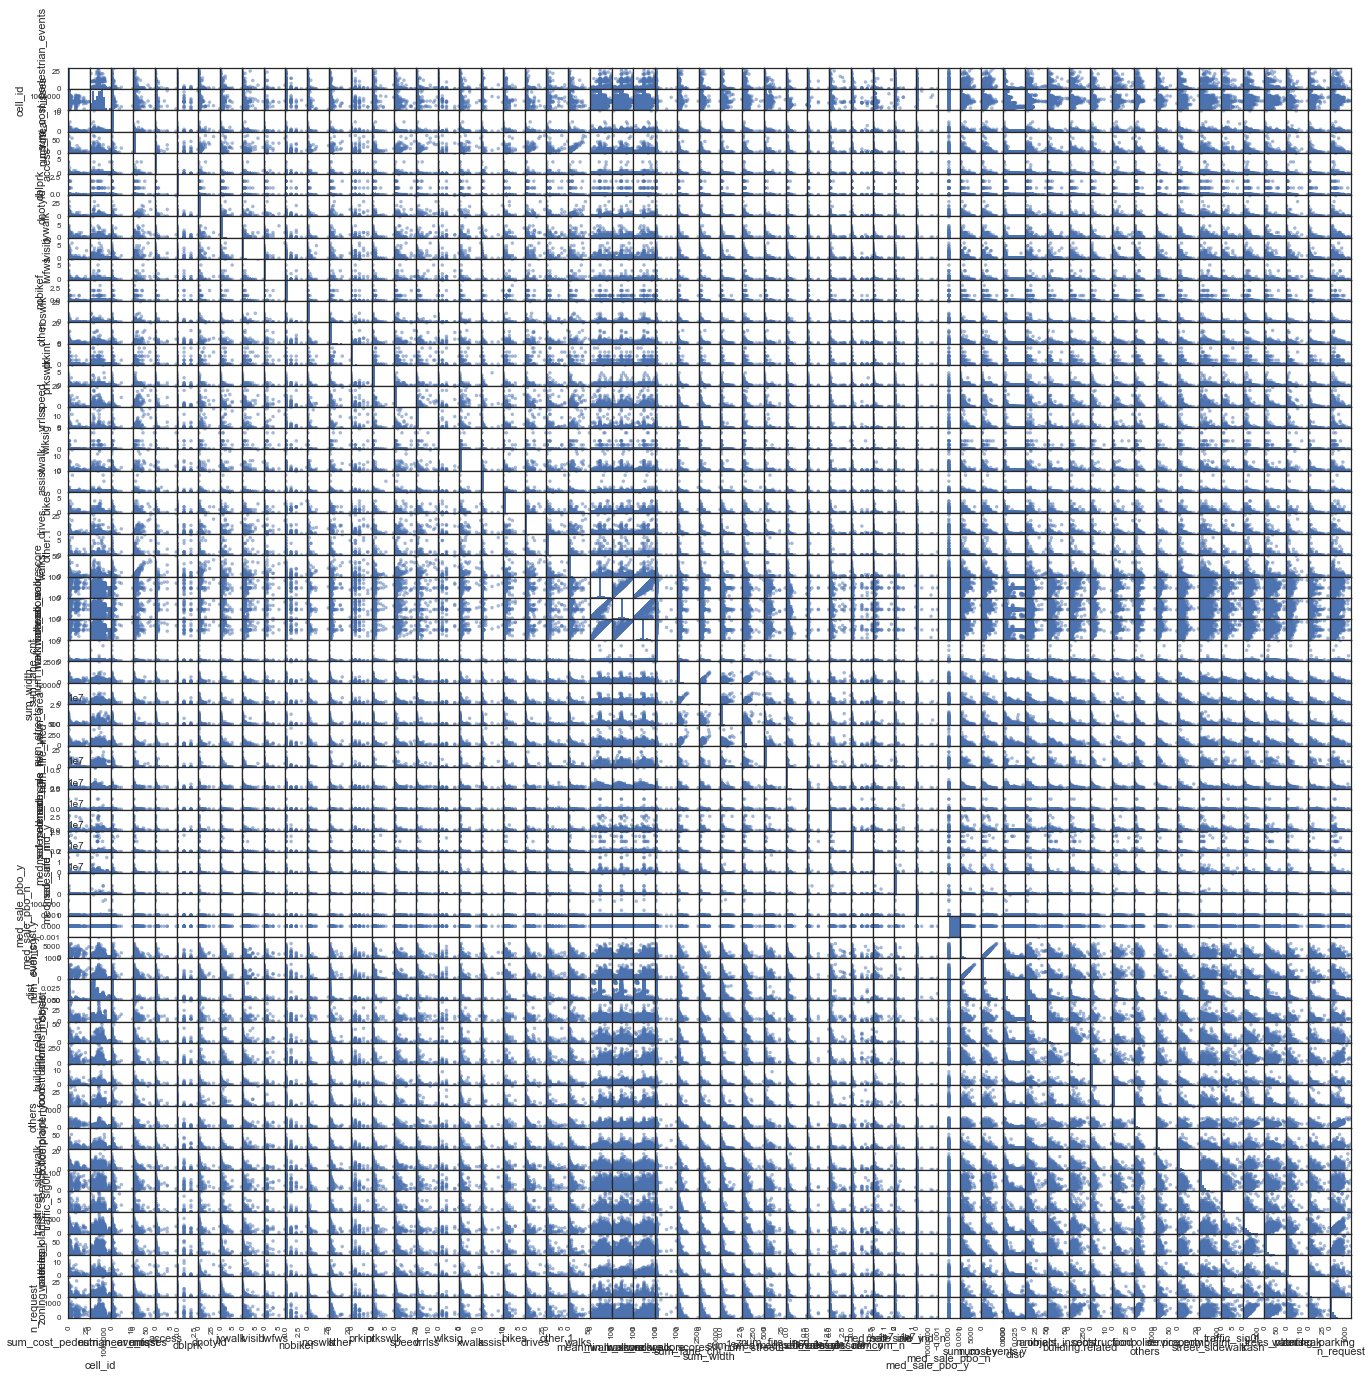

In [15]:
pd.scatter_matrix(df, figsize=(23, 23))
#save plots for later use
plot_type = "scatter_"
plot_name = "Matrix"
data_file_ext = ".png"
plt_file_2_save = data_dir + plot_type + plot_name + data_file_ext
plt.savefig(plt_file_2_save)
    
plt.show()

In [17]:
corr

,sum_cost_pedestrian_events,cell_id,num_near_misses,n_rqst,access,dblprk,dnotyld,jywalk,lvisib,lwfws,...,others,police.property,service.complaint,street_sidewalk,traffic_sig0l,trash,trees_plants,water.leak,zoning_parking,n_request
sum_cost_pedestrian_events,1.000000,0.042220,0.036904,0.067879,0.003123,0.005059,0.037644,0.065008,0.066018,0.045330,...,0.333272,0.120731,0.085593,0.266115,0.167311,0.100354,0.145207,0.090254,0.113893,0.251600
cell_id,0.042220,1.000000,-0.048889,-0.056644,-0.018832,0.003898,-0.037279,-0.027405,-0.024391,-0.015227,...,0.104167,0.086763,0.050764,0.025223,-0.023140,0.024765,0.077052,-0.017012,0.104141,0.071548
num_near_misses,0.036904,-0.048889,1.000000,0.050350,-0.004108,0.001605,0.056900,0.038807,0.030379,-0.005105,...,0.073151,0.050779,0.032570,0.064027,0.140934,0.045545,0.014235,0.143128,0.023265,0.066312
n_rqst,0.067879,-0.056644,0.050350,1.000000,0.350975,0.246180,0.733133,0.433921,0.468145,0.442337,...,0.150571,0.080315,0.078345,0.172716,0.112454,0.093000,0.060177,0.196654,0.034258,0.141917
access,0.003123,-0.018832,-0.004108,0.350975,1.000000,0.020453,0.479225,0.038723,0.083969,0.073820,...,0.022131,0.012042,0.014567,0.041816,0.013595,0.041945,0.013474,0.152538,0.010784,0.035420
dblprk,0.005059,0.003898,0.001605,0.246180,0.020453,1.000000,0.071691,0.147575,0.125498,0.116908,...,0.065991,0.100462,0.063608,0.080791,0.065274,0.056192,0.056471,0.065462,0.040042,0.076989
dnotyld,0.037644,-0.037279,0.056900,0.733133,0.479225,0.071691,1.000000,0.234950,0.226428,0.160970,...,0.082186,0.030758,0.040590,0.090416,0.080146,0.041581,0.017208,0.170557,0.012346,0.069990
jywalk,0.065008,-0.027405,0.038807,0.433921,0.038723,0.147575,0.234950,1.000000,0.125545,0.301664,...,0.102017,0.030524,0.020813,0.101213,0.066482,0.040421,0.030087,0.078560,0.030049,0.083353
lvisib,0.066018,-0.024391,0.030379,0.468145,0.083969,0.125498,0.226428,0.125545,1.000000,0.225948,...,0.119346,0.084590,0.048473,0.122061,0.095194,0.070459,0.065894,0.129047,0.027923,0.113480
lwfws,0.045330,-0.015227,-0.005105,0.442337,0.073820,0.116908,0.160970,0.301664,0.225948,1.000000,...,0.098038,0.039841,0.028474,0.082140,0.033014,0.046164,0.059560,0.060326,0.011669,0.083766


<font face="verdana"> 
    
### Analysis of categorical variables

NO CATEGORICAL VARIABLES. THIS SECTION IS EMPTY ******************* IGNORE ******************************

In [27]:
#df.select_dtypes(include=['object']).columns
categorical_cols = []

Index([], dtype='object')

In [19]:
categorical_cols = df.select_dtypes(include=['object']).columns
#categorical_cols = categorical_cols.drop(['issue_d','earliest_cr_line','revol_util'])

<font face="verdana"> 
    
#### The following are the categorical variables in our dataset. For each of these categories, we will plot number records by its unique category

In [ ]:
for col in categorical_cols:
    print("Unique values for the column ",col)
    df[col].unique()

In [ ]:
sns.set(rc={'figure.figsize':(15,10.2)})

for col in categorical_cols:
    sns.countplot(y=col,data=df,palette='Set1',hue="")

#save plots for later use
plot_type = "Count_of_"
plot_name = str(col)
data_file_ext = ".png"
plt_file_2_save = data_dir + plot_type + plot_name + data_file_ext
plt.savefig(plt_file_2_save)

plt.show()

In [ ]:
sns.set_style('whitegrid')
for col in categorical_cols:
        sns.violinplot(x=col, y="", data=df,palette='rainbow',hue="")
        #save plots for later use
        plot_type = "Violin_"
        plot_name = str(col)
        data_file_ext = ".png"
        plt_file_2_save = data_dir + plot_type + plot_name + data_file_ext
        plt.savefig(plt_file_2_save)
    
        plt.show()